<a name="top"></a>
# Analysis of Airbnb Listings in Paris
Data provided by [Inside Airbnb](http://insideairbnb.com/get-the-data.html) under a Creative Commons CC0 1.0 Universal (CC0 1.0) "Public Domain Dedication" license.

Data Scraped: 02/14/21

Click the link below to jump to the CRISP-DM steps taken for this project:  
- **[Business Understanding](#business_understanding)**
- **[Data Understanding](#data_understanding)**
    - [Columns with no NaN values](#no_nan)
    - [Outliers in the Price Column](#price_outliers)
    - [Columns with NaN values](#nan)
    - [Coorelations in Quantitative Data](#correlations)
    - [Final Review of Categorical Features](#final_review)
    - [Listings Data Final Results](#final_results)
    - [Exploring calendar.csv](#calendar)
    - [Visualize the AVG Price](#visualize)
    - [Exploring reviews.csv](#reviews)
- **[Data Preparation](#data_prep)**
- **[Modeling](#modeling)**
    - [Lasso Model - Price](#lasso_price)
    - [Lasso Model - Reviews](#lasso_reviews)
    - [Other Explored Models](#other_models)
- **[Evaluation](#evaluation)**
    - [Price](#eval_price)
    - [Reviews](#eval_reviews)
- **[Deployment](#deployment)**  
- **[Data Export for Tableau](#export)**

***
<a name="business_understanding"></a>
## Business Understanding
### Business Objective  
Given that Paris has been selected as the host of the 2024 Olympic games, the objective of this analysis is to determine the variables in Airbnb listings for the "Entire home/apt" room type in Paris that impact listing price the most. With this information we can be better informed when selecting a potential or existing property to host on Airbnb in Paris.

### Business Questions  

1. Can we create a model that accurately predicts the price or review score based on features in this dataset?
2. Which listing features have the strongest correlations to 'price'?
3. Which listing features have the strongest correlations to 'review_scores_rating'?
4. Which Paris neighborhoods have the highest average listing price?
5. Which Paris neighborhoods have the most/least amount of listings? Do the neighborhoods with fewer listings have higher average listing prices?  
6. Are there times of the year that listing prices increase or decrease?
    
[Back to Top](#top)

***
<a name="data_understanding"></a>
## Data Understanding
Datasets for Airbnb listings in Paris are maintained and provided by [Inside Airbnb](http://insideairbnb.com/get-the-data.html). This data will be used in order to gain better insight into the business questions above.

The three Airbnb datasets for Paris provided by Inside Airbnb that will be explored in this analysis are:

- [listings.csv](#listings) - General data pulled for each listing ID currently on Airbnb in Paris.  
- [calendar.csv](#calendar) - Calendars of availability for each listing in Paris over a set period of time.  
- [reviews.csv](#reviews) - All reviews left for all listing IDs currently on Airbnb in Paris.  

[Back to Top](#top)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Used for predictive modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Used for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

import seaborn as sns

# Filter to ignore math related warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

***
<a name="listings"></a>
### Exploring listings.csv
Initial load of the listings.csv file for Pairs Airbnb listings, created by [Inside Airbnb](http://insideairbnb.com/get-the-data.html), in order to get to know the data.

[Back to Top](#top)

In [2]:
listings = pd.read_csv('./listings.csv')

In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64690 entries, 0 to 64689
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            64690 non-null  int64  
 1   listing_url                                   64690 non-null  object 
 2   scrape_id                                     64690 non-null  int64  
 3   last_scraped                                  64690 non-null  object 
 4   name                                          64627 non-null  object 
 5   description                                   63204 non-null  object 
 6   neighborhood_overview                         38740 non-null  object 
 7   picture_url                                   64689 non-null  object 
 8   host_id                                       64690 non-null  int64  
 9   host_url                                      64690 non-null 

Our data source (listings.csv) is comprised of 64690 Airbnb listings in Paris with 74 columns of data for each listing.

In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20210208234805,2021-02-14,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.04
1,3109,https://www.airbnb.com/rooms/3109,20210208234805,2021-02-13,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.18
2,5396,https://www.airbnb.com/rooms/5396,20210208234805,2021-02-12,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,...,10.0,10.0,8.0,7510402838018,t,1,1,0,0,1.64
3,7397,https://www.airbnb.com/rooms/7397,20210208234805,2021-02-14,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,...,10.0,10.0,10.0,7510400829623,f,2,2,0,0,2.26
4,7964,https://www.airbnb.com/rooms/7964,20210208234805,2021-02-13,Large & sunny flat with balcony !,Very large & nice apartment all for you! <br /...,NaN,https://a0.muscache.com/pictures/4471349/6fb3d...,22155,https://www.airbnb.com/users/show/22155,...,10.0,10.0,10.0,7510903576564,f,1,1,0,0,0.05


In [5]:
# Checking the breakdown of the room_type data in order to narrow down the data to fit the scope of our bussiness objective.
listings['room_type'].value_counts()

Entire home/apt    55378
Private room        7492
Hotel room          1396
Shared room          424
Name: room_type, dtype: int64

In [6]:
# Only the listings with the 'room_type' of 'Entire home/apt' fit our business problem.
# Dropping all other room types in order to narrow the data accordingly.

#USE
listings = listings[listings.room_type == 'Entire home/apt']
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55378 entries, 0 to 64689
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            55378 non-null  int64  
 1   listing_url                                   55378 non-null  object 
 2   scrape_id                                     55378 non-null  int64  
 3   last_scraped                                  55378 non-null  object 
 4   name                                          55324 non-null  object 
 5   description                                   54177 non-null  object 
 6   neighborhood_overview                         33630 non-null  object 
 7   picture_url                                   55377 non-null  object 
 8   host_id                                       55378 non-null  int64  
 9   host_url                                      55378 non-null 

There were 55378 properties listed as 'Entire home/apt' in the listings.csv file when the data was collected by Inside Airbnb on 02/14/21

**Looking at the data so far, it is apparent that there are a lot of columns that are not useful for the evaluations needed for the business objective:**

'listing_url'  
'scrape_id'  
'picture_url'  
'host_url'  
'host_thumbnail_url'  
'host_picture_url'  
'calendar_last_scraped'  
'latitude'  
'longitude'  

**Additional columns to investigate for relevance/useability include:**

'name'  
'description'  
'neighborhood_overview'  
'host_name'  
'host_since'  
'host_location'  
'host_about'  
'host_neighbourhood'  
'host_listings_count'  
'host_total_listings_count'  
'minimum_minimum_nights'  
'maximum_minimum_nights'  
'minimum_maximum_nights'  
'maximum_maximum_nights'  
'minimum_nights_avg_ntm'  
'maximum_nights_avg_ntm'  
'license'  
'calculated_host_listings_count'  
'calculated_host_listings_count_entire_homes'  
'calculated_host_listings_count_private_rooms'  
'calculated_host_listings_count_shared_rooms'  
***

In [7]:
# Dropping columns we know are not needed in order to make further investigation easier
col_drop = ['listing_url', 'scrape_id', 'picture_url', 'host_url', 'host_thumbnail_url', 
            'host_picture_url', 'calendar_last_scraped', 'latitude', 'longitude']

listings.drop(col_drop, axis=1, inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55378 entries, 0 to 64689
Data columns (total 65 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            55378 non-null  int64  
 1   last_scraped                                  55378 non-null  object 
 2   name                                          55324 non-null  object 
 3   description                                   54177 non-null  object 
 4   neighborhood_overview                         33630 non-null  object 
 5   host_id                                       55378 non-null  int64  
 6   host_name                                     55346 non-null  object 
 7   host_since                                    55346 non-null  object 
 8   host_location                                 55232 non-null  object 
 9   host_about                                    28031 non-null 

In [8]:
listings.head()

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,2021-02-14,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.04
1,3109,2021-02-13,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.18
2,5396,2021-02-12,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",7903,Borzou,2009-02-14,"Istanbul, İstanbul, Turkey",We are both journalists based in the Middle Ea...,...,10.0,10.0,8.0,7510402838018,t,1,1,0,0,1.64
3,7397,2021-02-14,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,2626,Franck,2008-08-30,"Paris, Île-de-France, France","I am a writer,51, author of novels, books of l...",...,10.0,10.0,10.0,7510400829623,f,2,2,0,0,2.26
4,7964,2021-02-13,Large & sunny flat with balcony !,Very large & nice apartment all for you! <br /...,NaN,22155,Anaïs,2009-06-18,"Paris, Île-de-France, France",Hello ! \r\nOur apartment is great and I am su...,...,10.0,10.0,10.0,7510903576564,f,1,1,0,0,0.05


It is apparent from further investigation of the head and info data above that the following fields are not relevant to our objective:  

'name'  
'description'  
'neighborhood_overview'  
'host_name'  
'host_location'  
'host_about'  
'host_neighbourhood'  
'host_verifications'  
'neighbourhood'  
'amenities'  
'bathrooms'  
'calendar_updated'  
'minimum_minimum_nights'  
'maximum_minimum_nights'  
'minimum_maximum_nights'  
'maximum_maximum_nights'  
'minimum_nights_avg_ntm'  
'maximum_nights_avg_ntm'  
'host_acceptance_rate'  
'neighbourhood_group_cleansed'  

In [9]:
# Dropping columns identified above to again make further investigation easier
col_drop = ['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'host_neighbourhood',
            'host_verifications', 'neighbourhood', 'amenities', 'bathrooms', 'calendar_updated', 'minimum_minimum_nights',
            'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
            'maximum_nights_avg_ntm', 'host_acceptance_rate', 'neighbourhood_group_cleansed']
listings.drop(col_drop, axis=1, inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55378 entries, 0 to 64689
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            55378 non-null  int64  
 1   last_scraped                                  55378 non-null  object 
 2   host_id                                       55378 non-null  int64  
 3   host_since                                    55346 non-null  object 
 4   host_response_time                            19885 non-null  object 
 5   host_response_rate                            19885 non-null  object 
 6   host_is_superhost                             55346 non-null  object 
 7   host_listings_count                           55346 non-null  float64
 8   host_total_listings_count                     55346 non-null  float64
 9   host_has_profile_pic                          55346 non-null 

There are 32 NaN values across almost all "host" columns. We need to investigate whether those are the same 32 listings or randomly spread across the columns.

In [10]:
# Exploring the 32 NaN entries in the host columns to verify if they are the same columns
print(listings.loc[(listings['host_is_superhost'] != 't') & (listings['host_is_superhost'] != 'f')])

             id last_scraped    host_id host_since host_response_time  \
1048     674148   2021-02-12    3422570        NaN                NaN   
1365     819381   2021-02-12    4303444        NaN                NaN   
4495    3261736   2021-02-13   16494364        NaN                NaN   
6587    4742022   2021-02-13   24478218        NaN                NaN   
7765    5741764   2021-02-14   29780312        NaN                NaN   
7948    5872399   2021-02-12    1721954        NaN                NaN   
8086    5987708   2021-02-12   31087586        NaN                NaN   
8590    6300239   2021-02-12    1721954        NaN                NaN   
9762    6875069   2021-02-12   20618245        NaN                NaN   
10307   7070896   2021-02-12   37073350        NaN                NaN   
11339   7447839   2021-02-11   31392706        NaN                NaN   
11543   7526817   2021-02-12   33200781        NaN                NaN   
12123   7883024   2021-02-11   33594473        NaN 

These are the same 32 listings with NaN values across the "host" columns which is very odd. These rows will be dropped so that the NaN values do not throw off the model. These rows are only .058% of the current dataset.

In [11]:
# Remove rows with NaN values in host columns
listings = listings.dropna(subset=['host_is_superhost'])
listings.shape

(55346, 45)

We are now working with 55346 listings with 45 columns of data for each.

In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55346 entries, 0 to 64689
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            55346 non-null  int64  
 1   last_scraped                                  55346 non-null  object 
 2   host_id                                       55346 non-null  int64  
 3   host_since                                    55346 non-null  object 
 4   host_response_time                            19885 non-null  object 
 5   host_response_rate                            19885 non-null  object 
 6   host_is_superhost                             55346 non-null  object 
 7   host_listings_count                           55346 non-null  float64
 8   host_total_listings_count                     55346 non-null  float64
 9   host_has_profile_pic                          55346 non-null 

***
<a name="no_nan"></a>
**Columns With No NaN Values**  

Exploring the data contained in the columns with no NaN values first. Columns with NaN values will be evaluated later in order to group together the actions taken to handle the NaN values for each respective column.

Columns to be reviewed:

'id'  
'last_scraped'  
'host_id'  
'host_since'  
'host_is_superhost'  
'host_listings_count'  
'host_total_listings_count'  
'host_has_profile_pic'  
'host_identity_verified'  
'neighbourhood_cleansed'  
'property_type'  
'room_type'  
'accommodates'  
'price'  
'minimum_nights'  
'maximum_nights'  
'has_availability'  
'availability_30'  
'availability_60'  
'availability_90'  
'availability_365'  
'number_of_reviews'  
'number_of_reviews_ltm'  
'number_of_reviews_l30d'  
'instant_bookable'  
'calculated_host_listings_count'  
'calculated_host_listings_count_entire_homes'  
'calculated_host_listings_count_private_rooms'  
'calculated_host_listings_count_shared_rooms'  

[Back to Top](#top)

In [13]:
# Are there any duplicates in the id field?
listings.id.nunique()

55346

No. All values are unique

In [14]:
# Exploring the last_scraped column
listings['last_scraped'].head()

0    2021-02-14
1    2021-02-13
2    2021-02-12
3    2021-02-14
4    2021-02-13
Name: last_scraped, dtype: object

This is a date field but the dtype is object. This needs to be converted into a usable date format.

There are 3 other date fields (host_since, first_review, and last_review) that will be converted to date format at this time as well.

In [15]:
# Converting the 'last_scraped', 'host_since', 'first_review', and 'last_review' columns to datetime dtype

listings[['last_scraped', 'host_since', 'first_review', 'last_review']] = \
listings[['last_scraped', 'host_since', 'first_review', 'last_review']].apply(pd.to_datetime)

listings[['last_scraped', 'host_since', 'first_review', 'last_review']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55346 entries, 0 to 64689
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   last_scraped  55346 non-null  datetime64[ns]
 1   host_since    55346 non-null  datetime64[ns]
 2   first_review  42765 non-null  datetime64[ns]
 3   last_review   42765 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 2.1 MB


In [16]:
listings[['last_scraped', 'host_since', 'first_review', 'last_review']].head()

,last_scraped,host_since,first_review,last_review
0,2021-02-14,2008-09-09,2019-01-02,2019-01-02
1,2021-02-13,2008-10-14,2016-12-27,2019-10-24
2,2021-02-12,2009-02-14,2009-06-30,2021-01-02
3,2021-02-14,2008-08-30,2011-04-08,2021-01-13
4,2021-02-13,2009-06-18,2010-05-10,2015-09-14


The dates are now good.
- Creating new columns with calculations using the datetime data in order to get the maximum value out of some of these columns. NaN and abnormal values will then be managed in the [Handling NaN](#handle_nan) section below.

Columns to be created:

days_host - Number of days between the host_since and the last_scraped columns  

days_reviews - Number of days between the first_review and last_review columns  

The original columns will then be dropped.

In [17]:
# Creating the days_host column
#CREDIT: https://stackoverflow.com/questions/33605514/how-to-extract-days-as-integers-from-a-timedelta64ns-object-in-python

listings['days_host'] = (listings['last_scraped'] - listings['host_since']).astype('timedelta64[D]')

listings['days_host'].head()

0    4541.0
1    4505.0
2    4381.0
3    4551.0
4    4258.0
Name: days_host, dtype: float64

In [18]:
# Creating the days_reviews column

listings['days_reviews'] = (listings['last_review'] - listings['first_review']).astype('timedelta64[D]')

listings['days_reviews'].head()

0       0.0
1    1031.0
2    4204.0
3    3568.0
4    1953.0
Name: days_reviews, dtype: float64

In [19]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55346 entries, 0 to 64689
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            55346 non-null  int64         
 1   last_scraped                                  55346 non-null  datetime64[ns]
 2   host_id                                       55346 non-null  int64         
 3   host_since                                    55346 non-null  datetime64[ns]
 4   host_response_time                            19885 non-null  object        
 5   host_response_rate                            19885 non-null  object        
 6   host_is_superhost                             55346 non-null  object        
 7   host_listings_count                           55346 non-null  float64       
 8   host_total_listings_count                     55346 non-null  floa

The 2 new columns look good. Days_reviews has NaN values which will be evaluated later.

- Dropping the last_scraped and host_since date columns as they are no longer needed.

In [20]:
# Dropping the last_scraped and host_since date columns
col_drop = ['last_scraped', 'host_since']
listings.drop(col_drop, axis=1, inplace=True)
listings.shape

(55346, 45)

We are now working with 45 columns of data.

In [21]:
# How many hosts have multiple listings?
listings.host_id.nunique()

46371

8975 listings are listed by hosts with multiple listings (55346 listings - 46371 unique host id's). That's more than expected but only 16% of all of the listings. 84% are presumbably listed by hosts with only one property listed on Airbnb in Paris.

In [22]:
# Exploring hosts that have multiple listings
listings['host_id'].value_counts()

291007369    627
6053288      241
2667370      236
33889201     215
325882341    199
            ... 
315531361      1
331065440      1
13518940       1
116420699      1
51576832       1
Name: host_id, Length: 46371, dtype: int64

Some hosts have over 100 listings in Paris. It's possible these are property managers and not owners.

In [23]:
# Adding a new column with the count of listings for each host_id in order to remove 6 existing columns
# that came with the dataset and appear to have this info. This new column is easier to create than to
# validate the data in each of the 6 existing columns.

listings['host_count'] = listings.groupby(['host_id'])['host_id'].transform('count')

In [24]:
# Dropping the 6 columns for host listing counts and keeping my new column for this info
col_drop = ['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count',
            'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms']
listings.drop(col_drop, axis=1, inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55346 entries, 0 to 64689
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           55346 non-null  int64         
 1   host_id                      55346 non-null  int64         
 2   host_response_time           19885 non-null  object        
 3   host_response_rate           19885 non-null  object        
 4   host_is_superhost            55346 non-null  object        
 5   host_has_profile_pic         55346 non-null  object        
 6   host_identity_verified       55346 non-null  object        
 7   neighbourhood_cleansed       55346 non-null  object        
 8   property_type                55346 non-null  object        
 9   room_type                    55346 non-null  object        
 10  accommodates                 55346 non-null  int64         
 11  bathrooms_text               55299 non-nu

We now have 40 columns of data.

In [25]:
# Exploring the host_is_superhost column
listings['host_is_superhost'].value_counts()

f    48726
t     6620
Name: host_is_superhost, dtype: int64

In [26]:
# Exploring the host_has_profile_pic column
listings['host_has_profile_pic'].value_counts()

t    55167
f      179
Name: host_has_profile_pic, dtype: int64

In [27]:
# Exploring the host_identity_verified column
listings['host_identity_verified'].value_counts()

t    42958
f    12388
Name: host_identity_verified, dtype: int64

The data in the 'host_is_superhost', 'host_has_profile_pic', and 'host_identity_verified' columns is good and could be useful for our model.

- These columns with 't' and 'f' will be updated in a later step to be True and False in order to be recognized as boolean.

In [28]:
# Explore the neighbourhood_cleansed column by percentage
listings['neighbourhood_cleansed'].value_counts(normalize=True) * 100

Buttes-Montmartre      11.567232
Popincourt              9.953746
Vaugirard               7.451306
Entrepôt                7.167636
Batignolles-Monceau     6.741228
Ménilmontant            5.722184
Buttes-Chaumont         5.510787
Passy                   5.071731
Temple                  4.909117
Opéra                   4.545947
Reuilly                 4.054494
Observatoire            3.743721
Bourse                  3.505222
Gobelins                3.254074
Panthéon                3.248654
Hôtel-de-Ville          3.223359
Luxembourg              2.921620
Palais-Bourbon          2.753587
Élysée                  2.506053
Louvre                  2.148303
Name: neighbourhood_cleansed, dtype: float64

By far the most listings are in the Buttes-Montmartre and Popincourt neighborhoods with over 20% of all the listings in just these two neighborhoods.

- Is the average listing price higher or lower in those two neighborhoods?

For our business case at this point, it would seem that we would be better off being a host of a property in a neighborhood with a lower percentage of the listings as supply is lower but of course demand for those neighborhoods would need to be high for that to work for our business case. We will see if that is true with further evaluation of the data.

In [29]:
# Explore the property_type column by percentage
listings['property_type'].value_counts(normalize=True) * 100

Entire apartment             93.146750
Entire condominium            3.228779
Entire loft                   1.985690
Entire house                  0.619738
Entire serviced apartment     0.316193
Entire townhouse              0.294511
Entire guesthouse             0.072273
Entire place                  0.066852
Entire guest suite            0.056011
Room in aparthotel            0.045170
Tiny house                    0.045170
Entire villa                  0.027102
Boat                          0.023489
Houseboat                     0.010841
Room in boutique hotel        0.009034
Entire home/apt               0.009034
Earth house                   0.007227
Barn                          0.005420
Entire bungalow               0.005420
Dome house                    0.005420
Entire cottage                0.003614
Entire chalet                 0.001807
Casa particular               0.001807
Camper/RV                     0.001807
Entire floor                  0.001807
Campsite                 

93% are apartments

In [30]:
# Dropping the room_type column as all the values are the same. We previously narrowed the data down to only include listings with a room_type of "Entire home/apt".
listings = listings.drop(['room_type'], axis = 1)
listings.shape

(55346, 39)

We now have 39 columns of data.

In [31]:
# Exploring the accommodates column by total counts
listings['accommodates'].value_counts().sort_index()

1      1306
2     25688
3      5705
4     15226
5      2409
6      3382
7       460
8       692
9        89
10      197
11       33
12       69
13       17
14       26
15       23
16       24
Name: accommodates, dtype: int64

In [32]:
# Explore the accommodates column by percentage
listings['accommodates'].value_counts(normalize=True) * 100

2     46.413472
4     27.510570
3     10.307881
6      6.110649
5      4.352618
1      2.359701
8      1.250316
7      0.831135
10     0.355943
9      0.160807
12     0.124670
11     0.059625
14     0.046977
16     0.043364
15     0.041557
13     0.030716
Name: accommodates, dtype: float64

46% of listings accomodate 2 people and over 27% accomodate 4. This will be useful data for our model.

In [33]:
# Investigating the price column
listings['price'].value_counts().sort_index()

$1,000.00     29
$1,025.00      1
$1,035.00      4
$1,037.00      1
$1,043.00      1
            ... 
$99.00       544
$990.00        3
$995.00        1
$998.00        2
$999.00        4
Name: price, Length: 723, dtype: int64

This is not the expected output order. The price column dtype is object and the $ and ',' need to be removed in order to make these values floats.

In [34]:
# Removing $ and ',' from the price column.
# CREDIT: https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv

listings['price'] = listings['price'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [35]:
listings['price'].dtype

dtype('float64')

In [36]:
# Investigating the price column again
listings['price'].value_counts().sort_index()

8.0         1
9.0         6
10.0       10
12.0        9
13.0        1
           ..
9280.0      6
9631.0      1
10250.0     1
11599.0     1
12000.0     1
Name: price, Length: 723, dtype: int64

This is much better. The listing prices range from 8 euro up to 11,600 euro per night. (Assumption:  The price values are in euro not dollars as Paris is in France which uses the euro currency.)
- Note: 1 listing is 0 euro and is assumed to be note availble for rent as it is not logical that Airbnb would process a booking with no value. Further investigation is needed.

Looking closer at the price data, it looks like this is a large range from the min to max values and there may be outliers that need to be handled properly.

<a name="price_outliers"></a>
**Exploring Outliers in the Price Column**

[Back to Top](#top)

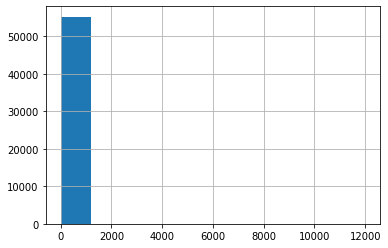

In [37]:
# Explore price for potential outliers
listings.price.hist();

This histogram is obviously heavily skewed right. The outliers with the highest value should be removed.

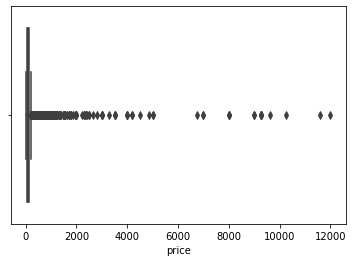

In [38]:
sns.boxplot(x=listings['price']);

There are many outliers in the price column. Let's take a look at the interquartile range (IQR) and then find the upper and lower limits.

In [39]:
# Finding the IQR using numpy.percentile
# CREDIT: https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/

Q1 = np.percentile(listings.price, 25, interpolation = 'midpoint') 
Q3 = np.percentile(listings.price, 75, interpolation = 'midpoint') 

IQR = Q3 - Q1 
  
print('\nQ1 =', Q1)
print('\nQ3 =', Q3)
print('\nIQR =', IQR)


Q1 = 60.0

Q3 = 120.0

IQR = 60.0


In [40]:
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

print('\nUpper Limit =', upper_limit)
print('\nLower Limit =', lower_limit)


Upper Limit = 210.0

Lower Limit = -30.0


Let's explore the quartiles and percentiles further.

In [41]:
# Exploring the quartile values
listings['price'].quantile([0.25, 0.5, 0.75, 1.0])

0.25       60.0
0.50       82.0
0.75      120.0
1.00    12000.0
Name: price, dtype: float64

The value at the 75th percentile is 120. Let's check the 95th percentile.

In [42]:
# Checking the value at the 95th percentile of the price column
listings['price'].quantile([0.95])

0.95    261.0
Name: price, dtype: float64

261 is the value at the 95th percentile which means the top 5% of the prices range from 261 to 12,000.

Based on the values returned above, the listings with a price above the upper limit which is currently 210 will be dropped. No listings with values on the lower end of our price range will be removed because they are all within the lower limit of -30.
- This action will be dynamic as to adjust each time a new dataset is processed.

In [43]:
listings.shape

(55346, 39)

In [44]:
# Dropping the rows that are between the lower and upper limits

Q1 = np.percentile(listings.price, 25, interpolation = 'midpoint')
Q3 = np.percentile(listings.price, 75, interpolation = 'midpoint')

IQR = Q3 - Q1

upper_limit = (Q3+(1.5)*(Q3 - Q1))
lower_limit = (Q1-(1.5)*(Q3 - Q1))

listings = listings[(listings.price >= lower_limit) & (listings.price <= upper_limit)]

listings.shape

(51029, 39)

In [45]:
listings['price'].value_counts().sort_index()

8.0        1
9.0        6
10.0      10
12.0       9
13.0       1
        ... 
206.0     21
207.0     14
208.0      8
209.0     20
210.0    109
Name: price, Length: 202, dtype: int64

4317 rows removed.

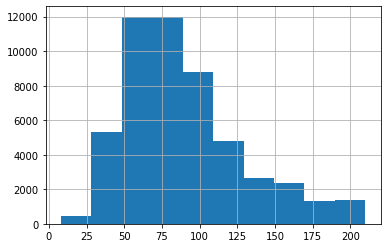

In [46]:
# Checking the histogram of the price column to see if the data looks better
listings.price.hist();

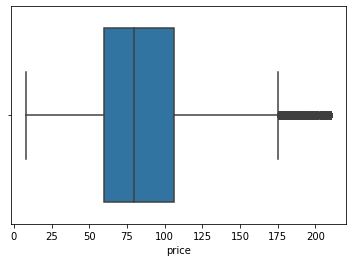

In [47]:
sns.boxplot(x=listings['price']);

The outliers have now been handled accurately. The histogram and boxplot look better but are still skewed to the right due to the majority of prices being in the lower end of the price range.

In [48]:
# Exploring the minimum_nights column
listings['minimum_nights'].value_counts().sort_index()

1       11195
2       13694
3        9714
4        4476
5        3850
        ...  
999         2
1000        1
1001        1
1124        1
1125        1
Name: minimum_nights, Length: 94, dtype: int64

Some of these values are very odd. Paris has a requirement that vacation rentals are only made available a certain percentage of the year. Any listing that has a minimum stay of 365 days or more is obviously either in violation of these rules or has had the minimum night extended out in order to make the listing non-bookable.

- Leaving this data as it is for our model.

In [49]:
# Exploring the maximum_nights column
listings['maximum_nights'].value_counts().sort_index()

1         64
2        177
3        283
4        287
5        421
        ... 
1800       1
2000       2
5000       1
50000      1
85554      1
Name: maximum_nights, Length: 232, dtype: int64

Again, some of these values are odd. Why set the maximum stay at 85554 days (234 years)?

- Leaving this data as it is for our model.

In [50]:
# Exploring the has_availability column
listings['has_availability'].value_counts()

t    50961
f       68
Name: has_availability, dtype: int64

This information is not very useful for our model. 68 out of 50961 listings are not available to book but even those unavailable listings will have valuable data for us.
- Dropping the has_availability column.

In [51]:
# Dropping the has_availability column.
listings = listings.drop(['has_availability'], axis = 1)
listings.shape

(51029, 38)

We are now working with 38 columns of data.

In [52]:
# Exploring the availability_30 column
listings['availability_30'].value_counts().sort_index()

0     34043
1       579
2       435
3       128
4       142
5        93
6       188
7       198
8       189
9       181
10      142
11      116
12      179
13      438
14      553
15      367
16      279
17      196
18      169
19      161
20      207
21      220
22      267
23      946
24      277
25      276
26      273
27     1278
28     2018
29     3037
30     3454
Name: availability_30, dtype: int64

In [53]:
# Exploring the availability_60 column
listings['availability_60'].value_counts().sort_index()

0     32597
1       513
2       397
3       134
4       112
      ...  
56      248
57     1232
58     1904
59     2882
60     3299
Name: availability_60, Length: 61, dtype: int64

In [54]:
# Exploring the availability_90 column
listings['availability_90'].value_counts().sort_index()

0     31688
1       503
2       374
3        96
4        93
      ...  
86      239
87     1196
88     1842
89     2773
90     3167
Name: availability_90, Length: 91, dtype: int64

In [55]:
# Exploring the availability_365 column
listings['availability_365'].value_counts().sort_index()

0      28756
1        419
2        327
3         68
4         61
       ...  
361      127
362      457
363      694
364     1192
365     1712
Name: availability_365, Length: 366, dtype: int64

Out of our 51029 listings, 34043 did not have availability in the 30 days after the date the data was scraped. Furthermore, 32597 do not have availability in 60 days and 31688 have none in 90 days.

In the availability_365 column, there are still 28756 listings (56% of our current total) that have 0 availability.

In [56]:
listings.shape

(51029, 38)

Assumption:  Any listings that are not available for rent for the next 365 days and have never been reviewed may have never been rented. These listings have a potential to have features that do not represent the rest of the data as a whole and will therefore be dropped.

In [57]:
# Dropping any rows where listings do not have any availability in the next 365 days and do not have any reviews.
listings['concat'] = listings['availability_365'] + listings['number_of_reviews']
listings = listings[listings.concat > 0].drop(['concat'], axis = 1)
listings.shape

(44001, 38)

Wow! 7028 listings were removed. We are now working with 44001 listings with 38 columns of data for each.

Since we have the availability_365 column and there are a lot of listings with no availability in the other availibility columns, I will be dropping the availability_30, availability_60, and availability_90 columns. This will reduce noise in our data.

In [58]:
# Dropping columns identified above to make further investigation of the data easier
col_drop = ['availability_30', 'availability_60', 'availability_90']
listings.drop(col_drop, axis=1, inplace=True)
listings.shape

(44001, 35)

We now have 35 columns.

In [59]:
# Exploring the number_of_reviews column
listings['number_of_reviews'].value_counts().sort_index()

0      4348
1      4973
2      3416
3      2655
4      2197
       ... 
608       1
609       1
621       1
636       1
700       1
Name: number_of_reviews, Length: 400, dtype: int64

This data is good and could be useful for our model.

In [60]:
# Exploring the number_of_reviews_ltm column
listings['number_of_reviews_ltm'].value_counts().sort_index()

0      27927
1       4881
2       2881
3       1840
4       1265
       ...  
97         1
100        1
103        2
105        1
116        1
Name: number_of_reviews_ltm, Length: 80, dtype: int64

Assumption:  This is column captures the number of reviews a listing has had over the last twelve months (ltm).

If so, this data is showing that 27927 listings have had no reviews in the last year and most likely have not been rented or were rented infrequently in that time.

In [61]:
# Exploring the number_of_reviews_l30d column
listings['number_of_reviews_l30d'].value_counts().sort_index()

0     41165
1      1512
2       565
3       331
4       186
5       104
6        55
7        43
8        19
9         5
10       10
11        3
12        2
14        1
Name: number_of_reviews_l30d, dtype: int64

94% of the listings (41165) have not had a review in the last 30 days.

The number_of_reviews_ltm and number_of_reviews_l30d is not neccesarily abnormal but it is heavily skewed. I will be dropping these columns.

In [62]:
# Dropping columns identified above to make further investigation of the data easier
col_drop = ['number_of_reviews_ltm', 'number_of_reviews_l30d']
listings.drop(col_drop, axis=1, inplace=True)
listings.shape

(44001, 33)

We now have 33 columns of data.

In [63]:
# Exploring the instant_bookable column
listings['instant_bookable'].value_counts()

f    31008
t    12993
Name: instant_bookable, dtype: int64

This data is good.

In [64]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           44001 non-null  int64         
 1   host_id                      44001 non-null  int64         
 2   host_response_time           16712 non-null  object        
 3   host_response_rate           16712 non-null  object        
 4   host_is_superhost            44001 non-null  object        
 5   host_has_profile_pic         44001 non-null  object        
 6   host_identity_verified       44001 non-null  object        
 7   neighbourhood_cleansed       44001 non-null  object        
 8   property_type                44001 non-null  object        
 9   accommodates                 44001 non-null  int64         
 10  bathrooms_text               43966 non-null  object        
 11  bedrooms                     32803 non-nu

There are 44001  listings and 33 columns now as we move to address the NaN values in the next section.

***
<a name="nan"></a>
**Handling NaN Values**  

Exploring the data contained in the columns with NaN values now.

Columns to be reviewed:

'host_response_time'  
'host_response_rate'  
'bathrooms_text'  
'bedrooms'  
'beds'  
'first_review'  
'last_review'  
'review_scores_rating'  
'review_scores_accuracy'  
'review_scores_cleanliness'  
'review_scores_checkin'  
'review_scores_communication'  
'review_scores_location'  
'review_scores_value'  
'license'  
'reviews_per_month'  
'days_reviews' 
'days_since_lreview' 

[Back to Top](#top)

In [65]:
# Exploring the host_response_time column
listings['host_response_time'].value_counts()

within an hour        8289
within a few hours    3506
within a day          3238
a few days or more    1679
Name: host_response_time, dtype: int64

This categorical variable column has 27289 NaN values. Further investigation of the host_response_rate will guide how these NaNs will need to be handled.

In [66]:
# Exploring the host_response_rate column
listings['host_response_rate'].value_counts()

100%    10098
0%       1065
90%       573
97%       406
98%       385
        ...  
54%         1
69%         1
46%         1
7%          1
53%         1
Name: host_response_rate, Length: 71, dtype: int64

This column is a percentage. Adding zeros here will introduce bias. Deeper investigation is needed.

In [67]:
# Convert host_response_rate column to float.
#CREDIT - https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv
listings['host_response_rate'] = listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0
listings['host_response_rate'].head()

0    0.00
1     NaN
2    0.88
3    1.00
4     NaN
Name: host_response_rate, dtype: float64

In [68]:
# Looking at the mean, median, and mode of the host_response_rate

# Mean
print('\nMean')
print(listings['host_response_rate'].mean())

# Median
print('\nMedian')
print(listings['host_response_rate'].median())

# Mode
print('\nMode')
print(listings['host_response_rate'].mode()[0])


Mean
0.8626621589276855

Median
1.0

Mode
1.0


In [69]:
# Further exploration of the host_response_rate data
listings['host_response_rate'].describe()

count    16712.000000
mean         0.862662
std          0.279150
min          0.000000
25%          0.900000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_response_rate, dtype: float64

In [70]:
listings.shape

(44001, 33)

There 27289 NaN values (62%) in the host_response_rate column. 1065 are 0%. The NaN rows are the same rows that have no host_response_time reported. That is a lot of data so they need to be kept but we cannot replace them with a biased mean, median, or mode value.

- To handle these NaN values, the following actions will be taken:

**host_response_time -** Add a new category for the NaN values called 'no data'.

**host_response_rate -** Convert this data to categorical data by creating a new column with values seperated into bins (no data, low, medium, high, and 100%), representing the data more evenly and to prevent bias.

In [71]:
# Handle NaN values in host_response_time coulmn
listings['host_response_time'].fillna('no data', inplace=True)

In [72]:
# View host_response_time column by percentage
listings['host_response_time'].value_counts(normalize=True) * 100

no data               62.019045
within an hour        18.838208
within a few hours     7.968001
within a day           7.358924
a few days or more     3.815822
Name: host_response_time, dtype: float64

In [73]:
# 1. Creating a new column called host_response_rate_cat
listings['host_response_rate_temp'] = listings['host_response_rate']

# 2. First we need to convert NaN values to a number. I am temporarily changing all 0 values to 0.02 (2nd lowest non-zero value)
# so that NaN can be 0.01 (lowest non-zero value)
listings['host_response_rate_temp'].replace(to_replace = 0.00, value = 0.02, inplace=True)

# 3. Temporarily converting NaN values to 0.01
listings['host_response_rate_temp'].fillna(0.01, inplace=True)

# 4. Copyinhg host_response_rate_temp column to a new column called host_response_rate_cat and converting all of the new column
# into category Bins. (Bin 1 = 'no data', Bin 2 = '0-49%', Bin 3 = '50-74%', Bin 4 = '75-99%', Bin 5 = '100%')
# CREDIT: O'Reilly "Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow" by Aurelien Geron page 54.
listings['host_response_rate_cat'] = pd.cut(listings['host_response_rate_temp'],
                                             bins=[0., 0.01, 0.50, 0.75, 0.99, np.inf],
                                             labels=['no data', 'low', 'medium', 'high', '100%'])
# 5. Dropping host_response_rate_temp column
listings.drop(['host_response_rate_temp'], axis=1, inplace=True)
listings['host_response_rate_cat'].head()

0        low
1    no data
2       high
3       100%
4    no data
Name: host_response_rate_cat, dtype: category
Categories (5, object): [no data < low < medium < high < 100%]

This worked as planned with the correct order of the categories. Now to check value_counts.

In [74]:
listings['host_response_rate_cat'].value_counts().sort_index()

no data    27289
low         2036
medium       871
high        3707
100%       10098
Name: host_response_rate_cat, dtype: int64

In [75]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           44001 non-null  int64         
 1   host_id                      44001 non-null  int64         
 2   host_response_time           44001 non-null  object        
 3   host_response_rate           16712 non-null  float64       
 4   host_is_superhost            44001 non-null  object        
 5   host_has_profile_pic         44001 non-null  object        
 6   host_identity_verified       44001 non-null  object        
 7   neighbourhood_cleansed       44001 non-null  object        
 8   property_type                44001 non-null  object        
 9   accommodates                 44001 non-null  int64         
 10  bathrooms_text               43966 non-null  object        
 11  bedrooms                     32803 non-nu

No more NaN values in the host_response_time and new category host_response_rate_cat column.

In [76]:
# Dropping the original host_response_rate column
listings.drop(['host_response_rate'], axis=1, inplace=True)

In [77]:
listings.shape

(44001, 33)

We are now back to having 33 rows.

In [78]:
# Exploring the bathrooms_text column
listings['bathrooms_text'].value_counts()

1 bath       39302
1.5 baths     2639
2 baths       1344
2.5 baths      273
Half-bath      217
0 baths         93
3 baths         78
3.5 baths       10
4 baths          7
4.5 baths        2
7 baths          1
Name: bathrooms_text, dtype: int64

This is categorical data with 43966 values and 35 NaN values.
- NaN values will be added to a new category called 'no data'.

In [79]:
# Filling NaN values in the bathrooms_text column with 'no data'
listings['bathrooms_text'].fillna('no data', inplace=True)

In [80]:
# Verifying the bathrooms_text column was updated properly
listings['bathrooms_text'].value_counts()

1 bath       39302
1.5 baths     2639
2 baths       1344
2.5 baths      273
Half-bath      217
0 baths         93
3 baths         78
no data         35
3.5 baths       10
4 baths          7
4.5 baths        2
7 baths          1
Name: bathrooms_text, dtype: int64

In [81]:
# Exploring the bedrooms column
listings['bedrooms'].value_counts()

1.0    24857
2.0     6420
3.0     1331
4.0      178
5.0       15
7.0        1
6.0        1
Name: bedrooms, dtype: int64

In [82]:
# Exploring the beds column
listings['beds'].value_counts()

1.0     23159
2.0     13943
3.0      3705
0.0      1279
4.0      1255
5.0       383
6.0       116
7.0        23
8.0        11
9.0         5
10.0        1
Name: beds, dtype: int64

In [83]:
listings[['bedrooms', 'beds']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bedrooms  32803 non-null  float64
 1   beds      43880 non-null  float64
dtypes: float64(2)
memory usage: 1.0 MB


There are 11198 missing values in the bedrooms columns and only 121 missing values in the beds column.

- Deeper investigation is needed in order to determine how to handle the NaN values.

In [84]:
# Looking at the mean, median, and mode to be used to replace the NaN values in the bedrooms and beds columns

# Mean
print('\nMean')
print(listings['bedrooms'].mean())
print(listings['beds'].mean())

# Median
print('\nMedian')
print(listings['bedrooms'].median())
print(listings['beds'].median())

# Mode
print('\nMode')
print(listings['bedrooms'].mode()[0])
print(listings['beds'].mode()[0])


Mean
1.295308355943054
1.5974247948951685

Median
1.0
1.0

Mode
1.0
1.0


After spot checking numerous listings with NaN values in the bedrooms column, it most likely that these are studio apartments. Furthermore, there are no listings currently with 0 bedrooms.

- The 11198 NaN values in the bedrooms columns will be imputed with 0 to represent studio apartments.

In the beds column, it is logical to assume that if a listing has 0 bedrooms, there is at a minimum 1 bed. Additionally, when a listing has 1 or more bedrooms listed, it is logical to assume there is at least 1 bed in each bedroom. Otherwise, it would not be a bedroom.

- The 121 NaN values in the beds column will be imputed with the number of bedrooms. Then all 0 values in the beds column will be replaced with 1 for the assumtion that there is at least 1 bed for each listing.

In [85]:
# Imputing the NaN values in the bedrooms column with 0 to denote a studio apartment
listings['bedrooms'].fillna(0, inplace = True)
listings['bedrooms'].value_counts()

1.0    24857
0.0    11198
2.0     6420
3.0     1331
4.0      178
5.0       15
7.0        1
6.0        1
Name: bedrooms, dtype: int64

In [86]:
# Imputing the NaN values in the beds column with the corresponding value in the bedrooms column of the same listing
listings['beds'].fillna(listings['bedrooms'], inplace=True)
listings[['beds']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   beds    44001 non-null  float64
dtypes: float64(1)
memory usage: 687.5 KB


In [87]:
# Imputing the "0.0" values in the beds column with "1.0" as these are assumed to be studio apartments and
# we assume there is at least 1 bed for each listing.
listings['beds'].replace(to_replace = 0.0, value = 1.0, inplace=True)
listings['beds'].value_counts()

1.0     24549
2.0     13949
3.0      3708
4.0      1255
5.0       384
6.0       116
7.0        23
8.0        11
9.0         5
10.0        1
Name: beds, dtype: int64

In [88]:
# Looking at the mean, median, and mode of the beds columns now that we have imputed the NaN values above

# Mean
print('\nMean')
print(listings['beds'].mean())

# Median
print('\nMedian')
print(listings['beds'].median())

# Mode
print('\nMode')
print(listings['beds'].mode()[0])


Mean
1.6252130633394695

Median
1.0

Mode
1.0


A quick check confirms that our calculations worked correctly and the mean for the beds column had a very minimal change after our imutations. The bedrooms and beds columns are ready for our model.

In [89]:
# Dropping the first_review and last_review columns as they were used to create calculated columns and are no longer needed.
col_drop = ['first_review', 'last_review']
listings.drop(col_drop, axis=1, inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           44001 non-null  int64   
 1   host_id                      44001 non-null  int64   
 2   host_response_time           44001 non-null  object  
 3   host_is_superhost            44001 non-null  object  
 4   host_has_profile_pic         44001 non-null  object  
 5   host_identity_verified       44001 non-null  object  
 6   neighbourhood_cleansed       44001 non-null  object  
 7   property_type                44001 non-null  object  
 8   accommodates                 44001 non-null  int64   
 9   bathrooms_text               44001 non-null  object  
 10  bedrooms                     44001 non-null  float64 
 11  beds                         44001 non-null  float64 
 12  price                        44001 non-null  float64 
 13  m

In [90]:
# Exploring the data in the ratings columns
listings['review_scores_rating'].value_counts().sort_index()

20.0      129
27.0        1
30.0        3
40.0       83
45.0        1
47.0        6
48.0        1
50.0       34
52.0        1
53.0       12
55.0        5
56.0        2
57.0        4
60.0      333
62.0        1
63.0        8
64.0       11
65.0       22
66.0       14
67.0       61
68.0       21
69.0       10
70.0      217
71.0       26
72.0       28
73.0      140
74.0       25
75.0       88
76.0       56
77.0       63
78.0       50
79.0       12
80.0     1913
81.0      114
82.0      198
83.0      368
84.0      441
85.0      564
86.0      484
87.0     1001
88.0      906
89.0      886
90.0     2349
91.0     1232
92.0     1356
93.0     2637
94.0     1786
95.0     2368
96.0     2577
97.0     2474
98.0     2482
99.0     1314
100.0    9763
Name: review_scores_rating, dtype: int64

The review_scores_rating column is a float between 20.0 and 100.0 (presumably the full range is 0-100) representing an overall rating for each listing. This is useful for our model.

There are 5320 NaN values. That's too many to drop and our business objective is not determinant on whether a listing has had reviews or not. It would be possible to makle this column into a category by creating bins.

In [91]:
# Exploring more ratings columns by percentage
listings['review_scores_accuracy'].value_counts(normalize=True) * 100

10.0    71.467019
9.0     22.270528
8.0      4.187046
7.0      0.856559
6.0      0.665062
2.0      0.279481
4.0      0.155267
5.0      0.106099
3.0      0.012939
Name: review_scores_accuracy, dtype: float64

In [92]:
# Exploring one more ratings column by percentage
listings['review_scores_communication'].value_counts(normalize=True) * 100

10.0    80.382973
9.0     15.031699
8.0      3.045672
7.0      0.584810
6.0      0.496830
2.0      0.263941
4.0      0.113857
5.0      0.077630
3.0      0.002588
Name: review_scores_communication, dtype: float64

The review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, and review_scores_value columns are floats representing a scale of 1-10.

- Dropping the 6 other ratings columns as to not introduce bias due to the number of NaN values in those columns. The review_scores_rating column is an overal rating that will be the most useful ratings column for our model.

In [93]:
# Dropping 6 "review_scores" columns. Only keeping the overall review_scores_rating column for our model.
col_drop = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
            'review_scores_location', 'review_scores_value']
listings.drop(col_drop, axis=1, inplace=True)
listings.shape

(44001, 25)

In [94]:
listings['review_scores_rating'].quantile([0.25, 0.5, 0.75, 1.0])

0.25     90.0
0.50     95.0
0.75    100.0
1.00    100.0
Name: review_scores_rating, dtype: float64

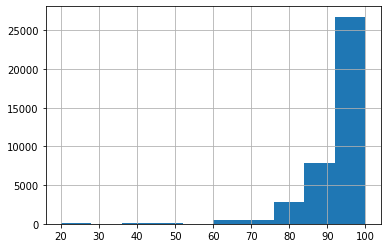

In [95]:
listings['review_scores_rating'].hist();

The value at the 25th percentile is 90 and the histogram shows the review_scores_rating column is heavily skewed left. I will create Bins to try to maintain the skew as close to the histogram of the quantitative values as possible.

Bin 1 = 'no review', Bin 2 = '0-49', Bin 3 = '50-79', Bin 4 = '80-99', Bin 5 = '100'

In [96]:
# 1. Creating a new column called review_scores_rating_cat
listings['review_scores_rating_temp'] = listings['review_scores_rating']

# 2. First we need to convert NaN values to a number. Although there are no 0 values in this data now, I am
# temporarily changing all 0 values to 0.02 (2nd lowest non-zero value) in case there are any 0 ratings in the future.
listings['review_scores_rating_temp'].replace(to_replace = 0.00, value = 0.02, inplace=True)

# 3. Temporarily converting NaN values to 0.01
listings['review_scores_rating_temp'].fillna(0.01, inplace=True)

# 4. Copyinhg review_scores_rating_temp column to a new column called review_scores_rating_cat and converting all of the new column
# into category Bins. (Bin 1 = 'no review', Bin 2 = '0-49', Bin 3 = '50-79', Bin 4 = '80-99', Bin 5 = '100')
# CREDIT: O'Reilly "Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow" by Aurelien Geron page 54.
listings['review_scores_rating_cat'] = pd.cut(listings['review_scores_rating_temp'],
                                             bins=[0., 0.01, 49, 79, 99, np.inf],
                                             labels=['no review', 'low', 'medium', 'high', '100%'])
# 5. Dropping review_scores_rating_temp column
listings.drop(['review_scores_rating_temp'], axis=1, inplace=True)
listings['review_scores_rating_cat'].head()

0    100%
1    100%
2    high
3    high
4    high
Name: review_scores_rating_cat, dtype: category
Categories (5, object): [no review < low < medium < high < 100%]

In [97]:
listings['review_scores_rating_cat'].value_counts().sort_index()

no review     5320
low            224
medium        1244
high         27450
100%          9763
Name: review_scores_rating_cat, dtype: int64

In [98]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        44001 non-null  int64   
 1   host_id                   44001 non-null  int64   
 2   host_response_time        44001 non-null  object  
 3   host_is_superhost         44001 non-null  object  
 4   host_has_profile_pic      44001 non-null  object  
 5   host_identity_verified    44001 non-null  object  
 6   neighbourhood_cleansed    44001 non-null  object  
 7   property_type             44001 non-null  object  
 8   accommodates              44001 non-null  int64   
 9   bathrooms_text            44001 non-null  object  
 10  bedrooms                  44001 non-null  float64 
 11  beds                      44001 non-null  float64 
 12  price                     44001 non-null  float64 
 13  minimum_nights            44001 non-null  int6

All good. No NaN values in the new category review_scores_rating_cat column.

In [99]:
# Dropping the original review_scores_rating column
listings.drop(['review_scores_rating'], axis=1, inplace=True)

In [100]:
listings.shape

(44001, 25)

In [101]:
# Exploring the data in the license column
listings['license'].head(10)

0              NaN
1              NaN
2    7510402838018
3    7510400829623
4    7510903576564
5              NaN
6    7511101582862
7              NaN
8              NaN
9             5962
Name: license, dtype: object

The license column is just the license number that the host gets in order to be able to leagally list their property.

This column is not needed for our use but it is interesting to see that only 16414 out of 44001 listings have a license listed. This is a requirement in Paris and Airbnb is not supposed to allow listings to be booked if the host has not provided it.

As of 02/08/21, Airbnb announced that they will no longer allow listings in Paris without this information to be booked. It is most likely that these are still listed in this data because it was scrubbed last on 02/14/21, about a week after the announcement was made. This column may become relevant at a later date.

In [102]:
# Dropping the license column
listings.drop(['license'], axis=1, inplace=True)

In [103]:
listings.shape

(44001, 24)

We now have 24 columns.

In [104]:
# Exploring what the data looks like in the reviews_per_month column
listings['reviews_per_month'].head(10)

0    0.04
1    0.18
2    1.64
3    2.26
4    0.05
5     NaN
6    0.27
7    0.35
8    0.13
9    0.30
Name: reviews_per_month, dtype: float64

NaN values in the reviews_per_month column are listings that have never been reviewed. These should actually be 0.

In [105]:
# Imputing NaN values in the reviews_per_month column with 0
listings['reviews_per_month'].fillna(0, inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        44001 non-null  int64   
 1   host_id                   44001 non-null  int64   
 2   host_response_time        44001 non-null  object  
 3   host_is_superhost         44001 non-null  object  
 4   host_has_profile_pic      44001 non-null  object  
 5   host_identity_verified    44001 non-null  object  
 6   neighbourhood_cleansed    44001 non-null  object  
 7   property_type             44001 non-null  object  
 8   accommodates              44001 non-null  int64   
 9   bathrooms_text            44001 non-null  object  
 10  bedrooms                  44001 non-null  float64 
 11  beds                      44001 non-null  float64 
 12  price                     44001 non-null  float64 
 13  minimum_nights            44001 non-null  int6

In [106]:
# Exploring the data in the days_reviews column
listings['days_reviews'].head(10)

0       0.0
1    1031.0
2    4204.0
3    3568.0
4    1953.0
5       NaN
6    2782.0
7    3937.0
8    2029.0
9    3215.0
Name: days_reviews, dtype: float64

This column is the difference in days between the first_review and last_review columns. NaN values mean that there has not been a review.
- NaN values will be imputed with 0.

In [107]:
# Imputing the NaN values in the days_reviews column with 0 to represent listings that have not had a review yet.
listings['days_reviews'].fillna(0, inplace=True)
listings['days_reviews'].head(10)

0       0.0
1    1031.0
2    4204.0
3    3568.0
4    1953.0
5       0.0
6    2782.0
7    3937.0
8    2029.0
9    3215.0
Name: days_reviews, dtype: float64

In [108]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        44001 non-null  int64   
 1   host_id                   44001 non-null  int64   
 2   host_response_time        44001 non-null  object  
 3   host_is_superhost         44001 non-null  object  
 4   host_has_profile_pic      44001 non-null  object  
 5   host_identity_verified    44001 non-null  object  
 6   neighbourhood_cleansed    44001 non-null  object  
 7   property_type             44001 non-null  object  
 8   accommodates              44001 non-null  int64   
 9   bathrooms_text            44001 non-null  object  
 10  bedrooms                  44001 non-null  float64 
 11  beds                      44001 non-null  float64 
 12  price                     44001 non-null  float64 
 13  minimum_nights            44001 non-null  int6

We have ended up with  44001 listings across 24 columns.

<a name="correlations"></a>
**Coorelations in Quantitative Data**  
Now we will check for coorelations in the quantitative data to make a final determination as to which columns will be most useful for our model.

[Back to Top](#top)

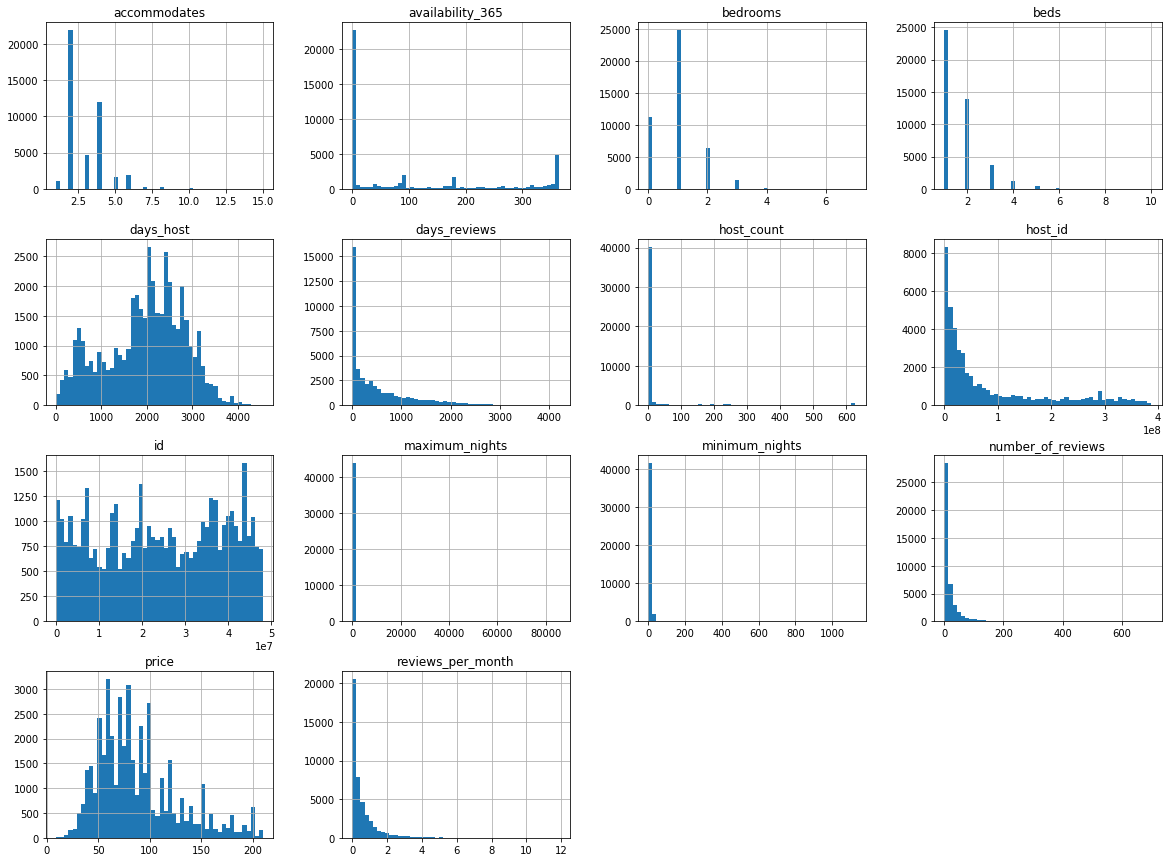

In [109]:
# Looking at histograms of the quantitative variable data
listings.hist(bins=50, figsize=(20,15));

***
**Exploring Correlations in the listings.csv Dataset**

In [110]:
# Creating a copy of the listings dataframe in order to drop some columns that are not needed
correlation_exp = listings.copy()

In [111]:
col_drop = ['host_id', 'id']
correlation_exp.drop(col_drop, axis=1, inplace=True)
correlation_exp.shape

(44001, 22)

In [112]:
corr_matrix = correlation_exp.corr()

In [113]:
# Looking for correlations in the listings quantitative variable data
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
bedrooms             0.501716
accommodates         0.483256
beds                 0.427846
availability_365     0.230452
days_reviews         0.100865
host_count           0.067865
number_of_reviews    0.054931
days_host            0.024730
maximum_nights       0.023106
reviews_per_month    0.016380
minimum_nights      -0.004081
Name: price, dtype: float64

In [114]:
corr_matrix['availability_365'].sort_values(ascending=False)

availability_365     1.000000
price                0.230452
reviews_per_month    0.190545
number_of_reviews    0.179610
days_reviews         0.175140
host_count           0.123107
minimum_nights       0.116188
accommodates         0.104286
beds                 0.083883
maximum_nights       0.033358
bedrooms             0.026494
days_host           -0.037611
Name: availability_365, dtype: float64

In [115]:
corr_matrix['number_of_reviews'].sort_values(ascending=False)

number_of_reviews    1.000000
reviews_per_month    0.739930
days_reviews         0.626292
availability_365     0.179610
days_host            0.148157
price                0.054931
accommodates         0.047545
beds                 0.036802
bedrooms            -0.000265
maximum_nights      -0.022492
minimum_nights      -0.022987
host_count          -0.023623
Name: number_of_reviews, dtype: float64

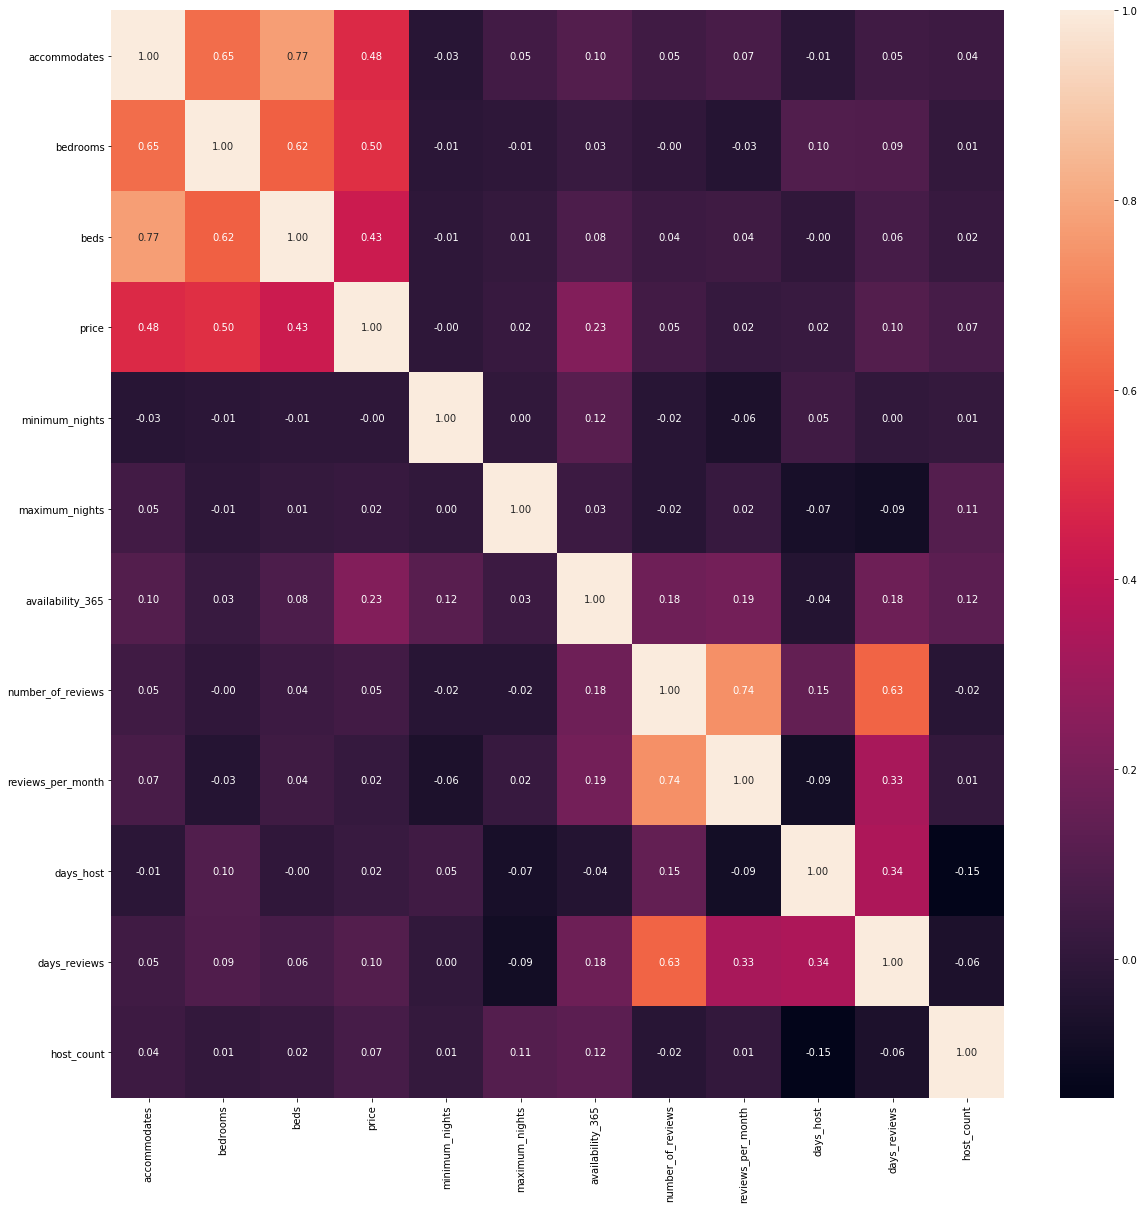

In [116]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt='.2f');

After reviewing the correlations above and checking the remaining data in our dataset, the following 8 columns will be dropped:

host_has_profile_pic - is not relevant to our business objective  
host_identity_verified - is not relevant to our business objective  
bathrooms_text - is not relevant to our business objective  
minimum_nights - no strong correlations identified above  
maximum_nights - no strong correlations identified above  

In [117]:
col_drop = ['host_has_profile_pic', 'host_identity_verified', 'bathrooms_text', 'minimum_nights', 'maximum_nights']
listings.drop(col_drop, axis=1, inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        44001 non-null  int64   
 1   host_id                   44001 non-null  int64   
 2   host_response_time        44001 non-null  object  
 3   host_is_superhost         44001 non-null  object  
 4   neighbourhood_cleansed    44001 non-null  object  
 5   property_type             44001 non-null  object  
 6   accommodates              44001 non-null  int64   
 7   bedrooms                  44001 non-null  float64 
 8   beds                      44001 non-null  float64 
 9   price                     44001 non-null  float64 
 10  availability_365          44001 non-null  int64   
 11  number_of_reviews         44001 non-null  int64   
 12  instant_bookable          44001 non-null  object  
 13  reviews_per_month         44001 non-null  floa

***
<a name="final_review"></a>
**Final Review of Categorical Features in the Listings Data**  

[Back to Top](#top)

In [118]:
# host_response_time
listings['host_response_time'].value_counts()

no data               27289
within an hour         8289
within a few hours     3506
within a day           3238
a few days or more     1679
Name: host_response_time, dtype: int64

In [119]:
# Convert host_response_time to category dtype
listings['host_response_time'] = listings['host_response_time'].astype('category')
listings[['host_response_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   host_response_time  44001 non-null  category
dtypes: category(1)
memory usage: 386.9 KB


In [120]:
# Set categorical order for host_response_time column
listings['host_response_time'].cat.reorder_categories(['no data', 'a few days or more', 'within a day', \
                                                       'within a few hours', 'within an hour'], inplace=True)
listings['host_response_time'].value_counts().sort_index()

no data               27289
a few days or more     1679
within a day           3238
within a few hours     3506
within an hour         8289
Name: host_response_time, dtype: int64

The host_response_time column has now been converted to the category dtype and put into categorical order.

In [121]:
# host_is_superhost
listings['host_is_superhost'].value_counts()

f    38235
t     5766
Name: host_is_superhost, dtype: int64

- Need to convert to True/False

In [122]:
# neighbourhood_cleansed
listings['neighbourhood_cleansed'].value_counts()

Buttes-Montmartre      5244
Popincourt             4628
Entrepôt               3279
Vaugirard              3249
Batignolles-Monceau    2882
Ménilmontant           2639
Buttes-Chaumont        2542
Temple                 2161
Opéra                  1985
Passy                  1946
Reuilly                1861
Observatoire           1674
Bourse                 1531
Gobelins               1485
Panthéon               1460
Hôtel-de-Ville         1398
Luxembourg             1141
Palais-Bourbon         1097
Élysée                  929
Louvre                  870
Name: neighbourhood_cleansed, dtype: int64

This is a lot of categories but the data is needed for our business objective.
- Keeping this column as is.

In [123]:
# property_type
listings['property_type'].value_counts()

Entire apartment             41157
Entire condominium            1508
Entire loft                    813
Entire house                   169
Entire serviced apartment      104
Entire townhouse                91
Entire guesthouse               36
Entire guest suite              28
Entire place                    24
Tiny house                      21
Room in aparthotel              16
Boat                             8
Entire villa                     4
Earth house                      3
Entire home/apt                  3
Dome house                       3
Room in boutique hotel           2
Entire cottage                   1
Entire bed and breakfast         1
Campsite                         1
Island                           1
Barn                             1
Camper/RV                        1
Houseboat                        1
Entire chalet                    1
Entire bungalow                  1
Casa particular                  1
Cave                             1
Name: property_type,

The number of unique values in this columns may introduce complexity but it could also be helpful for our model.
- Keeping this column.

In [124]:
# instant_bookable
listings['instant_bookable'].value_counts()

f    31008
t    12993
Name: instant_bookable, dtype: int64

- Need to convert to True/False

In [125]:
# host_response_rate_cat
listings['host_response_rate_cat'].value_counts().sort_index()

no data    27289
low         2036
medium       871
high        3707
100%       10098
Name: host_response_rate_cat, dtype: int64

- This column is good.

In [126]:
# review_scores_rating_cat
listings['review_scores_rating_cat'].value_counts().sort_index()

no review     5320
low            224
medium        1244
high         27450
100%          9763
Name: review_scores_rating_cat, dtype: int64

- This column is good.

In [127]:
# Converting the host_is_superhost and instant_bookable columns to True/False and bool dtype
#CREDIT: https://pbpython.com/pandas_dtypes.html

listings[['host_is_superhost', 'instant_bookable']] = \
np.where(listings[['host_is_superhost', 'instant_bookable']] == "t", True, False)

In [128]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        44001 non-null  int64   
 1   host_id                   44001 non-null  int64   
 2   host_response_time        44001 non-null  category
 3   host_is_superhost         44001 non-null  bool    
 4   neighbourhood_cleansed    44001 non-null  object  
 5   property_type             44001 non-null  object  
 6   accommodates              44001 non-null  int64   
 7   bedrooms                  44001 non-null  float64 
 8   beds                      44001 non-null  float64 
 9   price                     44001 non-null  float64 
 10  availability_365          44001 non-null  int64   
 11  number_of_reviews         44001 non-null  int64   
 12  instant_bookable          44001 non-null  bool    
 13  reviews_per_month         44001 non-null  floa

***
<a name="final_results"></a>
**Listings Data Final Results**

[Back to Top](#top)

Now that we understand the data in the listings.csv dataset and have started some data preparation, we have 45811 listings across 19 columns.

**Quantitative variable columns (12):**  
id  
host_id  
accommodates   
bedrooms  
beds  
price  
availability_365  
number_of_reviews  
reviews_per_month  
days_host  
days_reviews  
host_count  



**Categorical variable columns (7):**  
host_response_time  
host_is_superhost  
neighbourhood_cleansed  
property_type  
instant_bookable  
host_response_rate_cat  
review_scores_rating_cat  


***
<a name="calendar"></a>
### Exploring calendar.csv

[Back to Top](#top)

In [129]:
# Initial load of calendar.csv file to explore the data
calendar = pd.read_csv('./calendar.csv')
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23610091 entries, 0 to 23610090
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ GB


Over 23.6 million rows! This information may not be useful because the listings data has price, minimum_nights, and maximum_nights.

Assumption: Based on the number of rows, this is a 365 day view of availability for each individual listing with data that could change through out the year such as the price.

This may be useful to visualize times of the year that prices go up or down.

In [130]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11170,2021-02-13,f,$75.00,$75.00,2.0,1125.0
1,55239,2021-02-13,f,$360.00,$353.00,2.0,1125.0
2,55239,2021-02-14,t,$360.00,$353.00,2.0,1125.0
3,55239,2021-02-15,t,$360.00,$353.00,2.0,1125.0
4,55239,2021-02-16,t,$360.00,$353.00,2.0,1125.0


First, the date and price columns need to be converted as was done for the listings.csv data.

In [131]:
# Converting date column to datetime
calendar['date'] = pd.to_datetime(calendar['date'], yearfirst=True)
calendar['date'].head()

0   2021-02-13
1   2021-02-13
2   2021-02-14
3   2021-02-15
4   2021-02-16
Name: date, dtype: datetime64[ns]

In [132]:
# Remove $ and ',' from the price column

price = ['price']

# Clean up the $ and .00
for col in price:
    calendar.loc[:, col] = calendar[col].str.strip('$').str.replace(',', '').apply(float)
    
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23610091 entries, 0 to 23610090
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 1.2+ GB


In [133]:
calendar_final = calendar[['listing_id', 'date', 'price']]
calendar_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23610091 entries, 0 to 23610090
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   price       float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 540.4 MB


In [134]:
calendar_final.head()

,listing_id,date,price
0,11170,2021-02-13,75.0
1,55239,2021-02-13,360.0
2,55239,2021-02-14,360.0
3,55239,2021-02-15,360.0
4,55239,2021-02-16,360.0


In [135]:
calendar_final['date'].value_counts().sort_index()

2021-02-09     6745
2021-02-10    14309
2021-02-11    25396
2021-02-12    45057
2021-02-13    60405
              ...  
2022-02-12    20784
2022-02-13     6207
2022-02-14        1
2022-02-15        1
2022-02-16        1
Name: date, Length: 373, dtype: int64

The dates range from 02/09/21 - 02/16/22 but there is not the full amount of listings for the first few and last few days in the range.

Unfortunately, there are a few days at the beginning and the end of the date range of the data that doesn't include all of the listings. If a graph is created for the full year there is potential that the graph will not represent all of the listings.

In [136]:
calendar_final.shape

(23610091, 3)

In [137]:
# Filter calendar_final for just the listings being reviewed in the listings dataframe
listings_ids = listings['id']

calendar_final = calendar_final[calendar_final.listing_id.isin(listings_ids)]

calendar_final.shape

(16062429, 3)

That brought us down to 16,399,956 rows now.

In [138]:
# Filter by date range so that the visualization uses only days that have the full range of data
calendar_final = calendar_final[(calendar_final['date'] > '2021-02-13') & (calendar_final['date'] < '2022-02-12')]
calendar_final.shape

(15942115, 3)

***
<a name="visualize"></a>
**Visualize the AVG price over the coming year**

[Back to Top](#top)

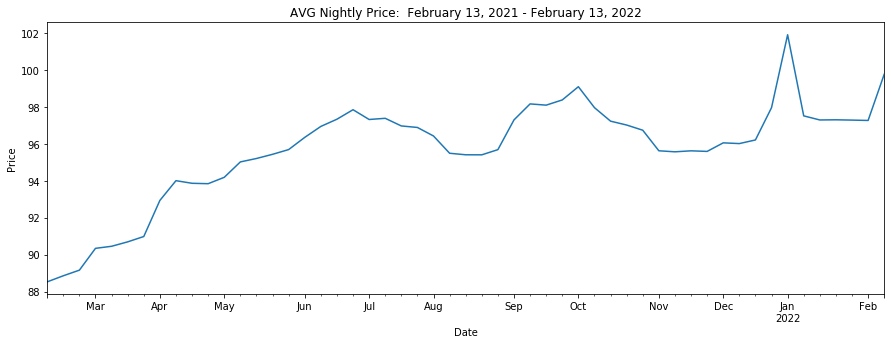

In [139]:
fig, ax = plt.subplots(figsize=(15, 11))
price_by_date = calendar_final.groupby(['date'])['price'].mean()

plt.subplot(211)

# Resample time series to weekly for easier visualization
price_by_date.resample('W').mean().plot()

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AVG Nightly Price:  February 13, 2021 - February 13, 2022')

plt.savefig('AVG_List_Price', bbox_inches='tight');

We can see from this line chart that the average price per night starts out at under 88 euro in February 2021 then slowly rises through the spring and into the summer.

The average price per night peaks at the end of June 2021 at 98 euros per night. Another peak in the price comes in October before declining slightly again just before a steep increase through the holiday season in December and leading up to the New Year holiday.

Observations:
- The lowest average nightly price at the beginning of the the chart may be due to hosts dropping the price on unbooked listings a month or two out from the current date.
- It is obvious from this chart that the average price is higher the further out that you go in terms of days.
- The peak in December is due to the very busy holiday season in Paris for Christmas and New Year.
- Another noticible peak in price comes in June as the summer tourist season ramps up going into July for Bastille day.

***
<a name="reviews"></a>
### Exploring reviews.csv

[Back to Top](#top)

In [140]:
# Initial load of reviews.csv file to explore the data
reviews = pd.read_csv('./reviews.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213727 entries, 0 to 1213726
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1213727 non-null  int64 
 1   id             1213727 non-null  int64 
 2   date           1213727 non-null  object
 3   reviewer_id    1213727 non-null  int64 
 4   reviewer_name  1213727 non-null  object
 5   comments       1213182 non-null  object
dtypes: int64(3), object(3)
memory usage: 55.6+ MB


In [141]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2577,366217274,2019-01-02,28047930,Kate,Beautiful apartment in a really handy location...
1,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...
2,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...
3,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
4,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...


This file isn't very useful for the business questions outlined earlier. It consists of over 1.2 million reviews for Paris listings with the date of the review and the comments provided. The most useful review information is already aggregated in the listings.csv file. I will not be using this file.

***
<a name="data_prep"></a>
## Data Preparation
In this section, learnings from the Data Understanding step above will be used to create functions that will prepare the data for our model.

[Back to Top](#top)

### Data Load and Clean Functions

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Used for predictive modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Used for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

import seaborn as sns

# Filter to ignore math related warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


def listings_df():
    '''
    OUTPUT:
    listings - a dataframe of selected columns from listings.csv
    '''
    # Creating our dataframe from listings.csv
    listings = pd.read_csv('./listings.csv', usecols=['id', 'host_id', 'accommodates', 'bedrooms', 'beds', 'price',
                                                  'availability_365', 'number_of_reviews', 'reviews_per_month',
                                                  'host_response_time', 'host_is_superhost', 'neighbourhood_cleansed',
                                                  'property_type', 'instant_bookable', 'last_scraped', 'host_since',
                                                  'room_type', 'last_review', 'first_review', 'host_response_rate',
                                                  'review_scores_rating'])
    
    return listings


def create_listings_df():
    ''' 
    OUTPUT:
    listings - a dataframe of selected columns from listings.csv with the data fully cleaned for use 
    '''
    # Create the listings dataframe
    listings = listings_df()
    
    # 1. Drop rows with a 'room_type' other than 'Entire home/apt'
    listings = listings[listings.room_type == 'Entire home/apt']
    listings.drop(['room_type'], axis=1, inplace=True)
    
    # 2. Drop rows with NaN values in host_is_superhost column 
    listings = listings.dropna(subset=['host_is_superhost'])
    
    # 3. CLean the price column
    # Remove $ and ',' from the price column
    listings['price'] = listings['price'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
    # Price outliers - Drop rows above the upper limit (Q3+(1.5)*IQR) and below the lower limit (Q1-(1.5)*IQR)
    # Find 1st and 3rd quartiles
    Q1 = np.percentile(listings.price, 25, interpolation = 'midpoint')
    Q3 = np.percentile(listings.price, 75, interpolation = 'midpoint')
    # Find IQR
    IQR = Q3 - Q1
    # Find upper and lower limits
    upper_limit = Q3+(1.5)*IQR
    lower_limit = Q1-(1.5)*IQR
    # Drop rows
    listings = listings[(listings.price >= lower_limit) & (listings.price <= upper_limit)]
    
    # 4. Drop rows where listings have no availability in the next 365 days and have no reviews
    listings['concat'] = listings["availability_365"] + listings["number_of_reviews"]
    listings = listings[listings.concat > 0].drop(['concat'], axis = 1)

    # 5. Convert date columns to datetime and then create new days_host and days_reviews columns
    # Converting the 'last_scraped', 'host_since', 'first_review', and 'last_review' columns to datetime dtype
    listings[['last_scraped', 'host_since', 'first_review', 'last_review']] = \
    listings[['last_scraped', 'host_since', 'first_review', 'last_review']].apply(pd.to_datetime)
    # Creating the days_host column
    listings['days_host'] = (listings['last_scraped'] - listings['host_since']).astype('timedelta64[D]')
    # Creating the days_reviews column
    listings['days_reviews'] = (listings['last_review'] - listings['first_review']).astype('timedelta64[D]')
    # Dropping the last_scraped, host_since, first_review, and last_review columns
    col_drop = ['last_scraped', 'host_since', 'first_review', 'last_review']
    listings.drop(col_drop, axis=1, inplace=True)

    # 6. Creating a new column with the count of listings for each host_id
    listings['host_count'] = listings.groupby(['host_id'])['host_id'].transform('count')
    
    # 7. Handle NaN values
    listings = list_nan(listings)
    
    # 8. Converting host_response_time column to category dtype
    listings['host_response_time'] = listings['host_response_time'].astype('category')

    listings['host_response_time'].cat.reorder_categories(['no data', 'a few days or more', 'within a day', \
                                                           'within a few hours', 'within an hour'], inplace=True)

    # 9. Converting the host_is_superhost and instant_bookable columns to True/False and bool dtype
    listings[['host_is_superhost', 'instant_bookable']] = \
    np.where(listings[['host_is_superhost', 'instant_bookable']] == "t", True, False)
    
    return listings


def list_nan(listings):
    '''
    INPUT:
    listings - the pandas dataframe created from listings.csv
    
    OUTPUT:
    listings - a dataframe that has had all known NaN values cared for in the 'host_response_time', 'host_resp_rate',
               'review_scores_rating_temp', 'bedrooms', 'reviews_per_month', 'days_reviews' 
    '''
    # 1. Impute the NaN values in host_response_time coulmn with 'no data'
    listings['host_response_time'].fillna('no data', inplace=True)

    # 2. Handle NaN values in host_response_rate coulmn
    listings = host_resp_rate(listings)
    
    # 3. Handle NaN values in review_scores_rating_temp coulmn
    listings = rev_scores_rating(listings)
    
    # 4. Impute the NaN values in the bedrooms, reviews_per_month, and days_reviews columns with 0
    nan_col = ['bedrooms', 'reviews_per_month', 'days_reviews']
    for col in nan_col:
        listings[col].fillna(0, inplace=True)

    # 5. Handle the NaN values in the beds column
    # Copying the corresponding value in the bedrooms column
    listings['beds'].fillna(listings['bedrooms'], inplace=True)
    # Imputing the NaN values in the beds column with the corresponding value in the bedrooms column of the same listing
    listings['beds'].replace(to_replace = 0.0, value = 1.0, inplace=True)

    return listings


def host_resp_rate(listings):
    '''
    INPUT:
    listings - the pandas dataframe created from listings.csv
    
    OUTPUT:
    listings - a dataframe that has had NaN values in the 'host_response_rate' column cared for by creating categorical bins
    '''
    # 1. Convert host_response_rate column to float
    listings['host_response_rate'] = listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0

    # 2. Creating a new column called host_response_rate_cat
    listings['host_response_rate_temp'] = listings['host_response_rate']

    # 3. Temporarily changing all 0 values to 0.02 (2nd lowest non-zero value)
    listings['host_response_rate_temp'].replace(to_replace = 0.00, value = 0.02, inplace=True)

    # 4. Temporarily convert NaN values to 0.01
    listings['host_response_rate_temp'].fillna(0.01, inplace=True)

    # 5. Copyinhg host_response_rate_temp column to a new column called host_response_rate_cat
    # Then converting the new column into category Bins.
    # (Bin 1 = 'no data', Bin 2 = '0-49%', Bin 3 = '50-74%', Bin 4 = '75-99%', Bin 5 = '100%')
    listings['host_response_rate_cat'] = pd.cut(listings['host_response_rate_temp'],
                                                 bins=[0., 0.01, 0.50, 0.75, 0.99, np.inf],
                                                 labels=['no data', 'low', 'medium', 'high', '100%'])
    
    # 6. Dropping host_response_rate_temp and the original host_response_rate columns
    col_drop = ['host_response_rate_temp', 'host_response_rate']
    listings.drop(col_drop, axis=1, inplace=True)

    return listings


def rev_scores_rating(listings):
    '''
    INPUT:
    listings - the pandas dataframe created from listings.csv
    
    OUTPUT:
    listings - a dataframe that has had NaN values in the 'rev_scores_rating' column cared for by creating categorical bins
    '''
    # 1. Creating a new column called review_scores_rating_cat
    listings['review_scores_rating_temp'] = listings['review_scores_rating']

    # 2. Temporarily changing all 0 values to 0.02 (2nd lowest non-zero value)
    listings['review_scores_rating_temp'].replace(to_replace = 0.00, value = 0.02, inplace=True)

    # 3. Temporarily convert NaN values to 0.01
    listings['review_scores_rating_temp'].fillna(0.01, inplace=True)

    # 4. Copyinhg review_scores_rating_temp column to a new column called review_scores_rating_cat
    # Then converting the new column into category Bins.
    # (Bin 1 = 'no review', Bin 2 = '0-49', Bin 3 = '50-79', Bin 4 = '80-99', Bin 5 = '100')
    listings['review_scores_rating_cat'] = pd.cut(listings['review_scores_rating_temp'],
                                                 bins=[0., 0.01, 49, 79, 99, np.inf],
                                                 labels=[1, 2, 3, 4, 5])
    
    # 5. Dropping review_scores_rating_temp and the original review_scores_rating columns
    col_drop = ['review_scores_rating_temp', 'review_scores_rating']
    listings.drop(col_drop, axis=1, inplace=True)

    return listings

In [2]:
listings = create_listings_df()

In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44001 entries, 0 to 64689
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        44001 non-null  int64   
 1   host_id                   44001 non-null  int64   
 2   host_response_time        44001 non-null  category
 3   host_is_superhost         44001 non-null  bool    
 4   neighbourhood_cleansed    44001 non-null  object  
 5   property_type             44001 non-null  object  
 6   accommodates              44001 non-null  int64   
 7   bedrooms                  44001 non-null  float64 
 8   beds                      44001 non-null  float64 
 9   price                     44001 non-null  float64 
 10  availability_365          44001 non-null  int64   
 11  number_of_reviews         44001 non-null  int64   
 12  instant_bookable          44001 non-null  bool    
 13  reviews_per_month         44001 non-null  floa

### Machine Learning Prep / Create ml_prep Function
Keeping our business questions in mind, dataframes will be created for use in models focused on price (X_price and y_price) as well as review scores (X_review and y_review).

In [4]:
def ml_prep(listings):
    '''
    INPUT:
    listings - the cleaned pandas dataframe created from listings.csv
    
    OUTPUT:
    X_price, y_price, X_review, y_review - 4 dataframes prepped for use for ML modeling
    '''
    # Create dummy columns for all categorical variable columns and drop the original columns
    cat_vars = ['neighbourhood_cleansed', 'property_type','host_response_rate_cat', 'host_response_time']
    for var in cat_vars:
        listings = pd.concat([listings.drop(var, axis=1), pd.get_dummies(listings[var], \
                             prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    # Create X_price
    X_price = listings.copy()
    
    # Drop the price column + columns with no correlation to the price column
    col_drop = ['price', 'id', 'host_id']
    X_price.drop(col_drop, axis=1, inplace=True)
    
    # Create y_price using the price column
    y_price = listings['price']
    
    # Create X_review
    X_review = listings.copy()
    
    # Drop the review_scores_rating_cat column + columns with no correlation to the review_scores_rating_cat column
    col_drop = ['review_scores_rating_cat', 'id', 'host_id']
    X_review.drop(col_drop, axis=1, inplace=True)
    
    # Create y_review using the review_scores_rating_cat column
    y_review = listings['review_scores_rating_cat']

    return X_price, y_price, X_review, y_review

#### Create X_price, y_price, X_review, y_review

In [5]:
X_price, y_price, X_review, y_review = ml_prep(listings)

In [6]:
X_price.shape

(44001, 66)

In [7]:
X_price.head()

,host_is_superhost,accommodates,bedrooms,beds,availability_365,number_of_reviews,instant_bookable,reviews_per_month,days_host,days_reviews,...,property_type_Room in boutique hotel,property_type_Tiny house,host_response_rate_cat_low,host_response_rate_cat_medium,host_response_rate_cat_high,host_response_rate_cat_100%,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,False,4,2.0,2.0,364,1,True,0.04,4541.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1,False,2,0.0,1.0,365,9,False,0.18,4505.0,1031.0,...,0,0,0,0,0,0,0,0,0,0
2,False,2,0.0,1.0,90,232,True,1.64,4381.0,4204.0,...,0,0,0,0,1,0,0,0,0,1
3,True,4,2.0,2.0,362,271,False,2.26,4551.0,3568.0,...,0,0,0,0,0,1,0,0,0,1
4,False,2,1.0,1.0,365,6,False,0.05,4258.0,1953.0,...,0,0,0,0,0,0,0,0,0,0


### Load  train_test_split  /  r2_score  /  mean_squared_error

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error     # From regressions in Intro to ML

### Split the Price dataset into training and test sets

In [9]:
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=.3, random_state=42)

In [10]:
X_review_train, X_review_test, y_review_train, y_review_test = train_test_split(X_review, y_review, test_size=.3, random_state=42)

### Load Cross Validate / Create display_scores Function

In [11]:
from sklearn.model_selection import cross_validate

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

***
<a name="modeling"></a>
## Modeling
In this section, the data prepared in the Data Preparation section above will be used to evaluate various machine learning models to identify the optimal algorithm and hyperparameters for our data and business questions.

[Back to Top](#top)

***
<a name="lasso_price"></a>
### Lasso Model - Price
#### Instantiate the Lasso model

Evaluating the Lasso regression first because there appears to be only a few features that are closely correlated to the price. Lasso will also further identify features that are not useful for us to use in a linear regression model.

[Back to Top](#top)

In [12]:
# CREDIT: Machine Learning with Python Cookbook by Chris Albon Section 13.4 pages 229-232
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize features with StandardScaler
scaler = StandardScaler()
X_price_train_scaler = scaler.fit_transform(X_price_train)

# Instantiate the Lasso Model
lasso_reg = Lasso(alpha=0.5)     # alpha 0.5 used as a neutral starting point

# Fit the Lasso Model to the training data
lasso_reg.fit(X_price_train_scaler, y_price_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Predict Using the Lasso Model

In [13]:
# Lasso model prediction
lasso_pred = lasso_reg.predict(X_price_train_scaler)
lasso_mse = mean_squared_error(y_price_train, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

29.92453886496501

#### Score the Lasso Model Using Cross Validate

In [14]:
lasso_scores = cross_validate(lasso_reg, X_price_train_scaler, y_price_train,
                                scoring=('r2', 'neg_mean_squared_error'), cv=10)

In [15]:
# View the RMSE of the Lasso Cross Validate scores
lasso_rmse_scores = np.sqrt(-lasso_scores['test_neg_mean_squared_error'])
display_scores(lasso_rmse_scores)

Scores: [29.42932108 29.864517   30.21113438 29.68977764 30.6502791  30.54199899
 29.79619605 30.43810993 29.55316623 29.48298243]
Mean: 29.96574828365513
Standard deviation: 0.43476242605445076


In [16]:
# View the r-squared of the Lasso Cross Validate scores
display_scores(lasso_scores['test_r2'])

Scores: [0.39883676 0.43452339 0.40067551 0.41019678 0.42085723 0.39937936
 0.42093466 0.41712125 0.41452147 0.41990542]
Mean: 0.4136951832730332
Standard deviation: 0.01093605612485655


#### Grid Search - Lasso Model

In [17]:
from numpy import arange
from sklearn.model_selection import GridSearchCV

# Instantiate the Lasso Model
lasso_reg = Lasso()

# Define grid
lasso_grid = dict()
lasso_grid['alpha'] = arange(0, 1, 0.01)

# Define grid search
lasso_gs = GridSearchCV(lasso_reg, lasso_grid, scoring=('r2', 'neg_mean_squared_error'), refit='r2', cv=10, n_jobs=-1)

# Perform grid search
lasso_gs_results = lasso_gs.fit(X_price_train_scaler, y_price_train)

'The best cross-validated r-squared score is {} on config {}.'.format(lasso_gs_results.best_score_, lasso_gs_results.best_params_)

"The best cross-validated r-squared score is 0.41987864307951633 on config {'alpha': 0.06}."

***
<a name="lasso_reviews"></a>
### Lasso Model - Reviews

Using the Lasso regression to evaluate the review_scores_rating_cat column that was created from the review_scores_ratings column of the original data. The Lasso regression was the best evaluated model for predicting the price.

[Back to Top](#top)

### Split the Review dataset into training and test sets

In [18]:
X_review_train, X_review_test, y_review_train, y_review_test = train_test_split(X_review, y_review, test_size=.3, random_state=42)

In [19]:
y_review_train.head()

4943     4
38233    4
48507    3
3103     5
15254    4
Name: review_scores_rating_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

#### Instantiate the Lasso model

In [20]:
# CREDIT: Machine Learning with Python Cookbook by Chris Albon Section 13.4 pages 229-232
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize features with StandardScaler
scaler = StandardScaler()
X_review_train_scaler = scaler.fit_transform(X_review_train)

# Instantiate the Lasso Model
lasso_reg = Lasso(alpha=0.5)     # alpha 0.5 used as a neutral starting point

# Fit the Lasso Model to the training data
lasso_reg.fit(X_review_train, y_review_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Predict Using the Lasso Model

In [21]:
# Lasso model prediction
lasso_pred = lasso_reg.predict(X_review_train)
lasso_mse = mean_squared_error(y_review_train, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

1.0909132561568367

#### Score the Lasso Model Using Cross Validate

In [22]:
lasso_scores = cross_validate(lasso_reg, X_review_train, y_review_train,
                                scoring=('r2', 'neg_mean_squared_error'), cv=10)

In [23]:
# View the RMSE of the Lasso Cross Validate scores
lasso_rmse_scores = np.sqrt(-lasso_scores['test_neg_mean_squared_error'])
display_scores(lasso_rmse_scores)

Scores: [1.11494928 1.07312716 1.08433503 1.10383405 1.11820573 1.06872257
 1.10081671 1.07135255 1.08156619 1.09353216]
Mean: 1.0910441426066817
Standard deviation: 0.017077340269324146


In [24]:
# View the r-squared of the Lasso Cross Validate scores
display_scores(lasso_scores['test_r2'])

Scores: [0.09748207 0.1010057  0.12067545 0.09050426 0.10880587 0.09847846
 0.11576563 0.10094793 0.08864977 0.11123925]
Mean: 0.10335543792037034
Standard deviation: 0.009984315009265424


#### Grid Search - Lasso Model

In [25]:
from numpy import arange
from sklearn.model_selection import GridSearchCV

# Instantiate the Lasso Model
lasso_reg = Lasso()

# Define grid
lasso_grid = dict()
lasso_grid['alpha'] = arange(0, 1, 0.01)

# Define grid search
lasso_gs = GridSearchCV(lasso_reg, lasso_grid, scoring=('r2', 'neg_mean_squared_error'), refit='r2', cv=10, n_jobs=-1)

# Perform grid search
lasso_gs_results = lasso_gs.fit(X_review_train_scaler, y_review_train)

'The best cross-validated r-squared score is {} on config {}.'.format(lasso_gs_results.best_score_, lasso_gs_results.best_params_)

C:\Users\Leone\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Leone\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Leone\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16999.247575153106, tolerance: 4.091305425324616
  positive)


"The best cross-validated r-squared score is 0.16428012064205988 on config {'alpha': 0.0}."

***
<a name="other_models"></a>
## Other Models Explored
Models that were explored but not used follow below. These models had evaluation scores that were lower than the Lasso Model and therefore were not used.

[Back to Top](#top)

***
## Elastic Net - Price
### Instantiate the Elastic Net model

Using Elastic Net regression just as Lasso was used in order to narrow down features as to only use those that are most important to price.

In [12]:
# CREDIT: https://machinelearningmastery.com/elastic-net-regression-in-python/
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# Standardize features with StandardScaler
scaler = StandardScaler()
X_price_train_scaler = scaler.fit_transform(X_price_train)

# Instantiate the Elastic Net Model
elasticnet_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)     # alpha 1.0 and l1_ratio 0.5 used as a balanced start point

# Fit the Elastic Net Model to the training data
elasticnet_reg.fit(X_price_train_scaler, y_price_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
elasticnet_pred = elasticnet_reg.predict(X_price_train_scaler)
elasticnet_mse = mean_squared_error(y_price_train, elasticnet_pred)
elasticnet_rmse = np.sqrt(elasticnet_mse)
elasticnet_rmse

30.815380768480807

#### Score the Elastic Net Model Using Cross Validate

In [14]:
elasticnet_scores = cross_validate(elasticnet_reg, X_price_train_scaler, y_price_train,
                                scoring=('r2', 'neg_mean_squared_error'), cv=10)

In [15]:
# View the RMSE of the Elastic Net Cross Validate scores
elasticnet_rmse_scores = np.sqrt(-elasticnet_scores['test_neg_mean_squared_error'])
display_scores(elasticnet_rmse_scores)

Scores: [30.15921428 30.84610672 30.95601773 30.62913986 31.69672728 31.34965636
 30.70321235 31.40696709 30.28966365 30.37693709]
Mean: 30.84136423977076
Standard deviation: 0.487093536311385


In [16]:
# View the r-squared of the Lasso Cross Validate scores
display_scores(elasticnet_scores['test_r2'])

Scores: [0.3686474  0.39674023 0.37075738 0.3722845  0.38063649 0.36719354
 0.3851438  0.37942417 0.38497631 0.38419396]
Mean: 0.378999776729124
Standard deviation: 0.008818282898720331


#### Grid Search - Elastic Net Model

In [17]:
from numpy import arange
from sklearn.model_selection import GridSearchCV

# Instantiate the Lasso Model
elasticnet_reg = ElasticNet()

# Define grid
elasticnet_grid = dict()
# elasticnet_grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
# elasticnet_grid['l1_ratio'] = arange(0, 1, 0.01)

# Define grid search
elasticnet_gs = GridSearchCV(elasticnet_reg, elasticnet_grid, scoring=('r2', 'neg_mean_squared_error'), refit='r2', cv=5, n_jobs=-1)

# Perform grid search
elasticnet_gs_results = elasticnet_gs.fit(X_price_train_scaler, y_price_train)

'The best cross-validated r-squared score is {} on config {}.'.format(elasticnet_gs_results.best_score_, elasticnet_gs_results.best_params_)

'The best cross-validated r-squared score is 0.3791916858735053 on config {}.'

#### Predict on the Test Data Using the Elastic Net Model with alpha=0.01 and l1_ratio=0.69

In [18]:
# Standardize features in Test Data with StandardScaler
X_price_test_scaler = scaler.fit_transform(X_price_test)

# Instantiate the Lasso Model  
elasticnet_reg_TEST = ElasticNet(alpha=0.01, l1_ratio=0.69)     # alpha 0.01 l1_ratio 0.69 identified in grid search

# Fit the Lasso Model to the training data
elasticnet_reg_TEST.fit(X_price_train_scaler, y_price_train)

# Lasso model prediction - TEST DATA
elasticnet_pred_TEST = elasticnet_reg_TEST.predict(X_price_test_scaler)
elasticnet_mse_TEST = mean_squared_error(y_price_test, elasticnet_pred_TEST)
elasticnet_rmse_TEST = np.sqrt(elasticnet_mse_TEST)
elasticnet_rmse_TEST

29.803743187985308

#### Find the R-Squared Score for the Test Data Using the Elastic Net Model with alpha=0.01 and l1_ratio=0.69

In [19]:
'The r-squared score for the Lasso Model on the Test Data was {} on {} values.'.format(r2_score(
    y_price_test, elasticnet_pred_TEST), len(y_price_test))

'The r-squared score for the Lasso Model on the Test Data was 0.40630701777146994 on 13201 values.'

#### Further Exploration of the Coefficients of the Elastic Net Model

In [20]:
def coef_weights(coefficients, X_price_test_scaler):
    '''
    INPUT:
    coefficients - the coefficients of the Lasso model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_price_test.columns
    coefs_df['coefs'] = elasticnet_reg_TEST.coef_
    coefs_df['abs_coefs'] = np.abs(elasticnet_reg_TEST.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(elasticnet_reg_TEST.coef_, X_price_test_scaler)

#A quick look at the top results
coef_df.head(55)

,est_int,coefs,abs_coefs
2,bedrooms,13.399903,13.399903
1,accommodates,8.923910,8.923910
4,availability_365,6.795614,6.795614
17,neighbourhood_cleansed_Hôtel-de-Ville,3.729992,3.729992
7,reviews_per_month,-3.581196,3.581196
20,neighbourhood_cleansed_Ménilmontant,-3.528677,3.528677
0,host_is_superhost,3.488747,3.488747
13,neighbourhood_cleansed_Buttes-Chaumont,-3.385774,3.385774
28,neighbourhood_cleansed_Temple,3.255755,3.255755
19,neighbourhood_cleansed_Luxembourg,3.032290,3.032290


#### The Elastic Net Model:

- Produced the best r-squared score of 0.41936 and RMSE of 30.00158 using an alpha of 0.01 and l1_ratio of 0.69.
- Returned correlation coefficients that very closely matches the Lasso Model with only insignificant differences.

***
## Linear Model - Price
Trying out linear regression to see how our previous results with lasso and elastic net compare.

### Create a New ml_prep Function for the Linear Regression
In order to get the best results with the linear regression, features that our work to this point have determined have little to no importance to the price will be dropped. These features are:
- 'property_type'
- 'days_reviews'
- 'instant_bookable'
- 'number_of_reviews'
- 'days_host'
- 'host_count'

In [21]:
def ml_prep2(listings):    
    # Create dummy columns for all categorical variable columns and drop the original columns
    cat_vars = ['neighbourhood_cleansed','host_response_rate_cat', 'host_response_time']
    for var in cat_vars:
        listings = pd.concat([listings.drop(var, axis=1), pd.get_dummies(listings[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    # Create X_price
    X_price = listings.copy()
    
    # Drop the price column + columns with no correlation to the price column
    col_drop = ['price', 'id', 'host_id', 'property_type', 'days_reviews', 'instant_bookable', \
                'number_of_reviews', 'days_host', 'host_count']
    X_price.drop(col_drop, axis=1, inplace=True)
    
    # Create y_price using the price column
    y_price = listings['price']
    
    # Create X_review
    X_review = listings.copy()
    
    # Drop the review_scores_rating_cat column + columns with no correlation to the review_scores_rating_cat column
    col_drop = ['review_scores_rating_cat', 'id', 'host_id']
    X_review.drop(col_drop, axis=1, inplace=True)
    
    # Create y_review using the review_scores_rating_cat column
    y_review = listings['review_scores_rating_cat']

    return X_price, y_price, X_review, y_review

#### Create new X_price, y_price, X_review, y_review for Use in the Linear Model

In [22]:
X_price, y_price, X_review, y_review = ml_prep2(listings)

In [23]:
X_price.shape

(44001, 34)

#### Split the dataset into training and test sets

In [24]:
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=.3, random_state=42)

### Load  train_test_split  /  r2_score  /  mean_squared_error

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error     # From regressions in Intro to ML

### Load Cross Validate / Create display_scores Function

In [26]:
from sklearn.model_selection import cross_validate

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Instantiate the Linear Model

In [27]:
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
lm_model = LinearRegression(normalize=True)

# Fit the model to the training data
lm_model.fit(X_price_train, y_price_train)
        
# Predict and score the model
y_price_test_preds = lm_model.predict(X_price_test)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(
    y_price_test, y_price_test_preds), len(y_price_test))

'The r-squared score for the model using only quantitative variables was 0.40258344871421625 on 13201 values.'

#### Linear Model RMSE

In [28]:
rmse_pred = lm_model.predict(X_price_train)
lin_mse = mean_squared_error(y_price_train, rmse_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

29.8685426765004

#### Score the Linear Model Using Cross Validate

In [29]:
lin_scores = cross_validate(lm_model, X_price_train, y_price_train,
                                scoring=('r2', 'neg_mean_squared_error'), cv=10)

In [30]:
# View the RMSE of the Linear Model Cross Validate scores
lin_rmse_scores = np.sqrt(-lin_scores['test_neg_mean_squared_error'])
display_scores(lin_rmse_scores)

Scores: [29.37213493 29.75217613 30.1933508  29.63985441 30.47795962 30.53734415
 29.68438613 30.47662928 29.48628978 29.45438681]
Mean: 29.90745120360709
Standard deviation: 0.44075293053013387


In [31]:
# View the r-squared of the Lasso Cross Validate scores
display_scores(lin_scores['test_r2'])

Scores: [0.40117082 0.43876968 0.40138088 0.41217861 0.42735095 0.39956242
 0.42527238 0.41564505 0.41716825 0.42103014]
Mean: 0.415952918646861
Standard deviation: 0.012159237546447094


#### The Linear Model:

- Produced the a mean r-squared score of 0.416 and RMSE of 29.90 which is close to the Lasso and Elastic Net Models.

***
## Random Forest - Price
### Instantiate the Random Forest model

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Forest Model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Forest Model to the training data
forest_reg.fit(X_price_train, y_price_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### Random Forest RMSE

In [33]:
forest_pred = forest_reg.predict(X_price_train)
forest_mse = mean_squared_error(y_price_train, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

13.671679452392413

#### Score the Elastic Net Model Using Cross Validate

In [34]:
forest_scores = cross_validate(forest_reg, X_price_train, y_price_train,
                                scoring=('r2', 'neg_mean_squared_error'), cv=10)

In [35]:
# View the RMSE of the Elastic Net Cross Validate scores
forest_rmse_scores = np.sqrt(-forest_scores['test_neg_mean_squared_error'])
display_scores(forest_rmse_scores)

Scores: [31.17530693 31.48123664 31.06955092 31.03607102 31.91461702 31.21366642
 31.16154403 31.43478193 31.00336591 30.35018787]
Mean: 31.184032869128725
Standard deviation: 0.3807039902577649


In [36]:
# View the r-squared of the Lasso Cross Validate scores
display_scores(forest_scores['test_r2'])

Scores: [0.32538902 0.3716419  0.36613334 0.35549435 0.37209196 0.37267166
 0.36664987 0.37832448 0.35565178 0.38527801]
Mean: 0.36493263810280724
Standard deviation: 0.01578841869263888


#### Grid Search - Forest Model

In [37]:
from sklearn.model_selection import GridSearchCV

# Instantiate the Forest Model
forest_reg = RandomForestRegressor(random_state=42)

# Define grid search
grid_param = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, \
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
forest_gs = GridSearchCV(forest_reg, grid_param, cv=5, scoring=('r2', 'neg_mean_squared_error'), refit='r2', return_train_score=True)

# Perform grid search
forest_gs_results = forest_gs.fit(X_price_train, y_price_train)

'The best cross-validated r-squared score is {} on config {}.'.format(forest_gs_results.best_score_, forest_gs_results.best_params_)

"The best cross-validated r-squared score is 0.37104164494926 on config {'max_features': 8, 'n_estimators': 30}."

In [38]:
forest_gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

The Random Forest Model does not perform better than the Lasso Model. Keeping Lasso model results and moving on to create models based on the review_scores_rating_cat column.

***
<a name="evaluation"></a>
## Evaluation
The Lasso Model was the best at predicting the Price in the [Modeling](#modeling) section above producing the best scores of all models that were tried. The Lasso model for predicting price achieved the best scores using alpha=0.06. The Lasso model for predicting review score ratings achieved the best scores using alpha=0. This will now be tested using the Test datasets to ensure they perform as expected on unseen data. 

[Back to Top](#top)

<a name="eval_price"></a>

### Use the Lasso Model with alpha=0.06 to Predict the PRICE Using Test Data

[Back to Top](#top)

In [39]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize features in Test Data with StandardScaler
scaler = StandardScaler()
X_price_train_scaler = scaler.fit_transform(X_price_train)
X_price_test_scaler = scaler.fit_transform(X_price_test)

# Instantiate the Lasso Model
lasso_reg_TEST = Lasso(alpha=0.06)     # alpha 0.06 identified in grid search

# Fit the Lasso Model to the training data
lasso_reg_TEST.fit(X_price_train_scaler, y_price_train)

# Lasso model prediction - TEST DATA
lasso_pred_TEST = lasso_reg_TEST.predict(X_price_test_scaler)
lasso_mse_TEST = mean_squared_error(y_price_test, lasso_pred_TEST)
lasso_rmse_TEST = np.sqrt(lasso_mse_TEST)
lasso_rmse_TEST

29.910152154996368

#### Find the R-Squared Score for the Test Data Using the Lasso Model with alpha=0.06

In [40]:
'The r-squared score for the Lasso Model on the Test Data was {} on {} values.'.format(r2_score(
    y_price_test, lasso_pred_TEST), len(y_price_test))

'The r-squared score for the Lasso Model on the Test Data was 0.402060099336517 on 13201 values.'

#### Further Exploration of the Coefficients of the Lasso Model - PRICE

In [41]:
def coef_weights(coefficients, X_price_test_scaler):
    '''
    INPUT:
    coefficients - the coefficients of the Lasso model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_price_test.columns
    coefs_df['coefs'] = lasso_reg_TEST.coef_
    coefs_df['abs_coefs'] = np.abs(lasso_reg_TEST.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lasso_reg_TEST.coef_, X_price_test_scaler)

#A quick look at the top results
coef_df.head(55)

,est_int,coefs,abs_coefs
2,bedrooms,13.550533,13.550533
1,accommodates,8.978102,8.978102
4,availability_365,7.019201,7.019201
12,neighbourhood_cleansed_Hôtel-de-Ville,3.755685,3.755685
0,host_is_superhost,3.494208,3.494208
15,neighbourhood_cleansed_Ménilmontant,-3.439045,3.439045
23,neighbourhood_cleansed_Temple,3.310546,3.310546
8,neighbourhood_cleansed_Buttes-Chaumont,-3.287960,3.287960
14,neighbourhood_cleansed_Luxembourg,3.016581,3.016581
13,neighbourhood_cleansed_Louvre,2.696781,2.696781


#### The Lasso Model:

- Produced the best r-squared score of 0.41937 and RMSE of 29.91 euro using an alpha of 0.06.
- Gave the lowest correlation coefficient to the **property_type** variables.
    - This makes sense given that over 90% of the properties are apartments.
- Gave a high correlation coefficient to **host_is_superhost** column in relation to the price column.
- Gave a low correlation coefficient to **days_reviews** and **instant_bookable** columns in relation to the price column.
- The columns with the highest correlation coefficient to the price column are **bedrooms** and **accommodates**.
    - This is an obvious correlation that did not need machine learning to figure out (the larger the size the higher the price).
- Interestingly, **availability_365** had a high correlation coefficient to price meaning the higher the availabilityis for the next 365 days, the higher the price. This suggests that the higher priced listings are booked less frequently.
- The neighborhood with the highest positive correlation coefficient was **Hôtel-de-Ville**.
- The neighborhood with the highest negative correlation coefficient was **Ménilmontant**.

<a name="eval_reviews"></a>

### Use the Lasso Model with alpha=0 to Predict the REVIEW SCORE RATING Using Test Data

[Back to Top](#top)

In [42]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize features in Test and Train Data with StandardScaler
scaler = StandardScaler()
X_review_train_scaler = scaler.fit_transform(X_review_train)
X_review_test_scaler = scaler.fit_transform(X_review_test)

# Instantiate the Lasso Model
lasso_reg_TEST_R = Lasso(alpha=0)     # alpha 0 identified in grid search

# Fit the Lasso Model to the training data
lasso_reg_TEST_R.fit(X_review_train_scaler, y_review_train)

# Lasso model prediction - TEST DATA
lasso_pred_TEST_R = lasso_reg_TEST_R.predict(X_review_test_scaler)
lasso_mse_TEST_R = mean_squared_error(y_review_test, lasso_pred_TEST_R)
lasso_rmse_TEST_R = np.sqrt(lasso_mse_TEST_R)
lasso_rmse_TEST_R

C:\Users\Leone\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
C:\Users\Leone\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Leone\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16999.247575153106, tolerance: 4.091305425324616
  positive)


1.0536136311037876

#### Find the R-Squared Score for the Test Data Using the Lasso Model with alpha=0

In [43]:
'The r-squared score for the Lasso Model on the Test Data was {} on {} values.'.format(r2_score(
    y_review_test, lasso_pred_TEST_R), len(y_review_test))

'The r-squared score for the Lasso Model on the Test Data was 0.16045806422613107 on 13201 values.'

#### Further Exploration of the Coefficients of the Lasso Model - REVIEW SCORE RATINGS

In [44]:
def coef_weights_R(coefficients, X_review_test_scaler):
    '''
    INPUT:
    coefficients - the coefficients of the Lasso model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df_R = pd.DataFrame()
    coefs_df_R['est_int'] = X_review_test.columns
    coefs_df_R['coefs'] = lasso_reg_TEST_R.coef_
    coefs_df_R['abs_coefs'] = np.abs(lasso_reg_TEST_R.coef_)
    coefs_df_R = coefs_df_R.sort_values('abs_coefs', ascending=False)
    return coefs_df_R

#Use the function
coef_df_R = coef_weights_R(lasso_reg_TEST_R.coef_, X_review_test_scaler)

#A quick look at the top results
coef_df_R.head(55)

,est_int,coefs,abs_coefs
8,reviews_per_month,0.411124,0.411124
6,number_of_reviews,-0.312453,0.312453
10,days_reviews,0.270461,0.270461
5,availability_365,-0.257908,0.257908
60,host_response_rate_cat_high,-0.133078,0.133078
9,days_host,0.087480,0.087480
61,host_response_rate_cat_100%,-0.075343,0.075343
7,instant_bookable,-0.067698,0.067698
42,property_type_Entire condominium,-0.053841,0.053841
38,property_type_Entire apartment,-0.051676,0.051676


#### The Lasso Model for Review Score Rating:

- Produced the best r-squared score of 0.1605 and RMSE of 1.05 (on a rating scale of just 1-5) using an alpha of 0.
    - These are very low scores meaning this model is not reliable. It will not be used.
- Gave mostly insignificant results.
    - Highest positive correlation coefficient to the **reviews_per_month** variable.
    - Highest negative correlation coefficient to the **number_of_reviews** variable.
    - Interestingly, the model found negative correlations with the **number_of_reviews**, **availability_365**, **host_response_rate_cat**, **instant_bookable**, and most of the **neighbourhood_cleansed** columns.

***
<a name="deployment"></a>
## Deployment

Results of this data science project's business questions are below. Please see the corresponding blog post on Medium and the Tableau dashboard for further analysis.

[Back to Top](#top)

### Business Questions

1. **Can we create a model that accurately predicts the price or review score based on features in this dataset?**
    - We created a model that predicts the Price decently using lasso regression.
        - On our Test dataset, the Lasso Model for Price was able to accurately predict the price **40%** of the time which is not great but is still fairly decent considering the nature of Airbnb listings.
        - The Lasso Model had an **RMSE of 29 euro** on our Test dataset using alpha=0.06.
    - No model was found to reliably predict the review score ratings.
        - The Lasso Model for Reviews was only able to predict the review score rating **16%** of the time on our Test dataset and scores an **RMSE of 1.05** (on a rating scale of just 1-5) using alpha=0.
    - With more feature engineering, model selection, and hyperparameter tuning it is entirely possible to improve upon the scores of our Lasso Models for Price and Reviews.
    - Evaluating each listings distance to major attractions and Metro stations in Paris would be another way to boost prediction scores.

2. **Which listing features have the strongest correlations to 'price'?**
    - We found the answer to this question in the Data Understanding and in the Modeling sections above.
    - The Pandas corr() function was used to compute correlation of the quantitative variables in the listings dataframe to Price and found these to be the top correlations:
        - **bedrooms** with a correlation of **0.501716**
        - **accommodates** with a correlation of **0.483256**
        - **beds** with a correlation of **0.427846**
        - **availability_365** with a correlation of **0.230452**
    - Additionally, the Price Lasso Model evaluated all features and found the top correlations to Price to be:
        - **bedrooms**	with a correlation coefficient of **13.550533**
        - **accommodates**	with a correlation coefficient of **8.978102**
        - **availability_365**	with a correlation coefficient of **7.019201**
        - **neighbourhood_cleansed_Hôtel-de-Ville**	with a correlation coefficient of **3.755685**     - TOP NEIGHBORHOOD
        - **neighbourhood_cleansed_Ménilmontant**	with a correlation coefficient of **-3.439045**     - WORST NEIGHBORHOOD
        - **host_is_superhost**	with a correlation coefficient of **3.494208**

3. **Which listing variables have the strongest correlations to 'review_scores_rating'?**
    - The answer to this question was also found in the Data Understanding and Modeling sections above.
    - The Pandas corr() function was used to compute correlation of the quantitative variables in the listings dataframe to Review Score Ratings and found these to be the best correlations:
        - **reviews_per_month** with a correlation of **0.739930**
        - **days_reviews** with a correlation of **0.626292**
    - Additionally, the Reviews Lasso Model evaluated all features and found the top 5 correlations to Review Scores Rating to be:
        - **reviews_per_month**	with a correlation coefficient of **0.411124** 
        - **number_of_reviews**	with a correlation coefficient of **-0.312453** - NEGATIVE CORRELATION
        - **days_reviews**	with a correlation coefficient of **0.270461**
        - **availability_365**	with a correlation coefficient of **-0.257908** - NEGATIVE CORRELATION
        - **host_response_rate_cat_high**	with a correlation coefficient of **-0.133078** - NEGATIVE CORRELATION

4. **Which Paris neighborhoods have the highest average listing price?**
    - The top 5 Neighborhoods by average listing price are:
        - **Hôtel-de-Ville**  -  109.09 euro
        - **Louvre**  -  107.11 euro
        - **Élysée**  -  105.87 euro
        - **Luxembourg**  -  104.50 euro
        - **Temple**  -  103.63 euro
    - The bottom 5 Neighborhoods by average listing price are:
        - **Reuilly**  -  80.82 euro
        - **Gobelins**  -  80.07 euro
        - **Buttes-Montmartre**  -  78.36 euro
        - **Buttes-Chaumont**  -  74.64 euro
        - **Ménilmontant**  -  72.34 euro

In [45]:
price_hood = listings.groupby('neighbourhood_cleansed')['price'].mean().round(2).sort_values(ascending=False)
price_hood

neighbourhood_cleansed
Hôtel-de-Ville         109.09
Louvre                 107.11
Élysée                 105.87
Luxembourg             104.50
Temple                 103.63
Bourse                 101.14
Palais-Bourbon         100.73
Passy                   97.31
Panthéon                97.13
Opéra                   92.66
Vaugirard               90.15
Entrepôt                87.25
Batignolles-Monceau     85.71
Popincourt              83.25
Observatoire            82.82
Reuilly                 80.82
Gobelins                80.07
Buttes-Montmartre       78.36
Buttes-Chaumont         74.64
Ménilmontant            72.34
Name: price, dtype: float64

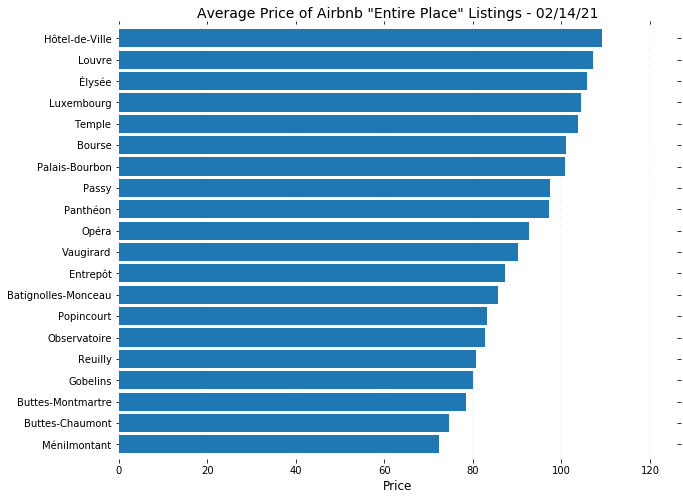

In [47]:
ax = price_hood.plot(kind='barh', figsize=(10, 8), zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set y-axis label
ax.set_ylabel('')
    
# Set x-axis label
ax.set_xlabel('Price', size=12)

# Set title
ax.set_title('Average Price of Airbnb "Entire Place" Listings - 02/14/21', size=14)

# Sort in decending order
ax.invert_yaxis()

plt.savefig('Price_Hood', bbox_inches='tight');

5. **Which Paris neighborhoods have the most/least amount of listings?** Do the neighborhoods with fewer listings have higher average listing prices?
    - The top 5 Neighborhoods by number of listings are:
        - **Buttes-Montmartre**  -  5244 listings
        - **Popincourt**  -  4628 listings
        - **Entrepôt**  -  3279 listings
        - **Vaugirard**  -  3249 listings
        - **Batignolles-Monceau**  -  2882 listings
    - The 5 Neighborhoods with the fewest listings are:
        - **Hôtel-de-Ville**  -  1398 listings
        - **Luxembourg**  -  1141 listings
        - **Palais-Bourbon**  -  1097 listings
        - **Élysée**  -  929 listings
        - **Louvre**  -  870 listings
    - Comparing the counts of listings per neighborhood with the average prices per neighborhood we can see that:
        - 4 of the neighborhoods with fewer listings rank in the top 5 in terms of highest average listing price.
            - **Hôtel-de-Ville**  -  109.09 euro
            - **Louvre**  -  107.11 euro
            - **Élysée**  -  105.87 euro
            - **Luxembourg**  -  104.50 euro
        - Conversely, 1 neighborhood (**Buttes-Montmartre**  -  78.36 euro) is in the top 5 in terns of number of listings is in the bottom 5 in terms of average listing price.

In [48]:
list_counts = listings['neighbourhood_cleansed'].value_counts()
list_counts

Buttes-Montmartre      5244
Popincourt             4628
Entrepôt               3279
Vaugirard              3249
Batignolles-Monceau    2882
Ménilmontant           2639
Buttes-Chaumont        2542
Temple                 2161
Opéra                  1985
Passy                  1946
Reuilly                1861
Observatoire           1674
Bourse                 1531
Gobelins               1485
Panthéon               1460
Hôtel-de-Ville         1398
Luxembourg             1141
Palais-Bourbon         1097
Élysée                  929
Louvre                  870
Name: neighbourhood_cleansed, dtype: int64

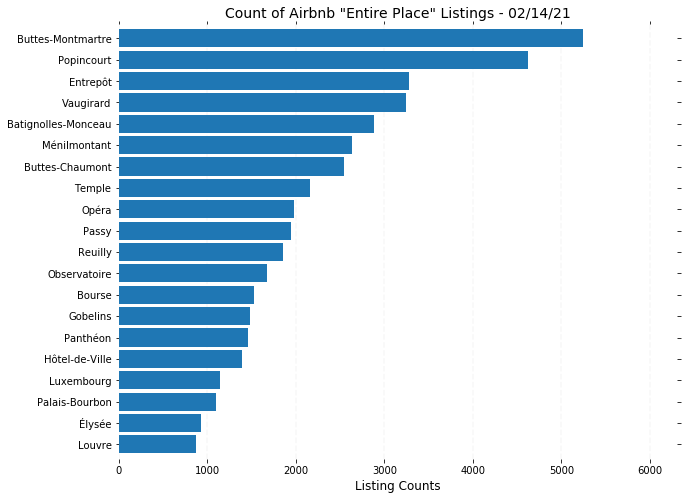

In [49]:
ax = list_counts.plot(kind='barh', figsize=(10, 8), zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel('Listing Counts', size=12)

# Set title
ax.set_title('Count of Airbnb "Entire Place" Listings - 02/14/21', size=14)

# Sort in decending order
ax.invert_yaxis()

plt.savefig('List_Count', bbox_inches='tight');

6. **Are there times of the year that listing prices increase or decrease?**
    - This answer was found in the Data Understanding section when we explored the Calendar dataset.
        - Hosts seem to lower the price on unbooked listings a month or two out from the current date.
        - The average price is higher the further out that you go in terms of days.
        - There is a peak in December for the very busy holiday season in Paris.
        - There is another peak in June as the summer tourist season ramps up going into July for Bastille day.

#### Prepare the Calendar data for visualization

In [51]:
# Initial load of calendar.csv file to explore the data
calendar = pd.read_csv('./calendar.csv')

# Converting date column to datetime
calendar['date'] = pd.to_datetime(calendar['date'], yearfirst=True)

# Remove $ and ',' from the price column
price = ['price']
# Clean up the $ and .00
for col in price:
    calendar.loc[:, col] = calendar[col].str.strip('$').str.replace(',', '').apply(float)

calendar_final = calendar[['listing_id', 'date', 'price']]

# Filter calendar_final for just the listings being reviewed in the listings dataframe
listings_ids = listings['id']
calendar_final = calendar_final[calendar_final.listing_id.isin(listings_ids)]

# Filter by date range so that the visualization uses only days that have the full range of data
calendar_final = calendar_final[(calendar_final['date'] > '2021-02-13') & (calendar_final['date'] < '2022-02-12')]

#### Visualize the Average Price Over the Next Year

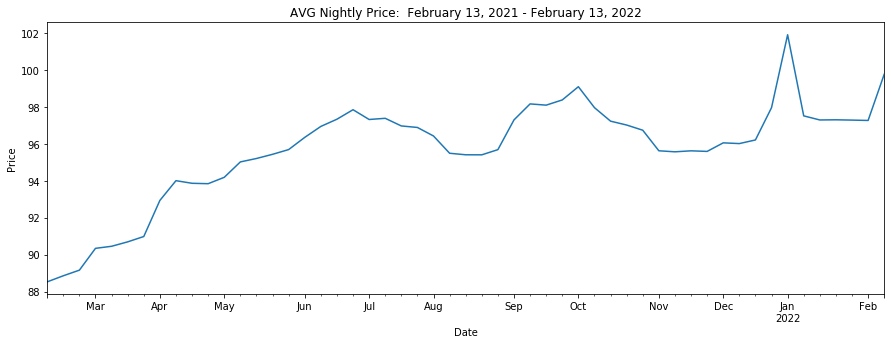

In [52]:
fig, ax = plt.subplots(figsize=(15, 11))
price_by_date = calendar_final.groupby(['date'])['price'].mean()

plt.subplot(211)

# Resample time series to weekly for easier visualization
price_by_date.resample('W').mean().plot()

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AVG Nightly Price:  February 13, 2021 - February 13, 2022')

plt.savefig('AVG_List_Price', bbox_inches='tight');

<a name="export"></a>
## Export Data for Tableau
The Tableau visualization can be found [here](https://public.tableau.com/views/ParisAirbnbAnalysis/Eiffel?:language=en&:display_count=y&publish=yes&:origin=viz_share_link).

[Back to Top](#top)

In [53]:
# Saving the listings dataframe to an Excel file for further expooration in Tableau
listings.to_excel('listings.xlsx')

In [54]:
# Saving the calendar_final dataframe to an Excel file for further expooration in Tableau
calendar_final.to_csv('calendar-export.csv')